### Importing Libraries

In [1]:
# Pre Processing 
import pandas as pd
import datetime as dt
import numpy as np

# Exploratory Data
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import squarify 
%matplotlib inline

# Pandasql Environment
import pandas as pd
import pandasql

from pandasql import sqldf 
sql_run = lambda q: sqldf(q, globals())

### Load Different Cars Brand Dataset

In [2]:
# Reading csv files
BMW = pd.read_csv('bmw.csv')
pd.set_option('display.max_columns', None)

AUD = pd.read_csv('audi.csv')
pd.set_option('display.max_columns', None)

TYT = pd.read_csv('toyota.csv')
pd.set_option('display.max_columns', None)

# Concating the csv files onto one
cars = pd.concat([BMW, AUD, TYT], ignore_index=True)
cars

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0
...,...,...,...,...,...,...,...,...,...
28182,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
28183,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
28184,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
28185,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


### Dataset Profiling

In [3]:
def dataset_profile(data):
    print("Dataset dimension :", data.ndim)
    print("Dataset shape :", data.shape)
    print("Dataset size :", data.size)

dataset_profile(cars)

Dataset dimension : 2
Dataset shape : (28187, 9)
Dataset size : 253683


In [4]:
def features_types(data):
    types = data.dtypes.reset_index()
    types.columns = ['Features','Data Type']
    return types

features_types(cars)

,Features,Data Type
0,model,object
1,year,int64
2,price,int64
3,transmission,object
4,mileage,int64
5,fuelType,object
6,tax,int64
7,mpg,float64
8,engineSize,float64


### Dataset Inspections

### Missing and Blank Values Checking 

In [5]:
def dataset_inspections(data):
    missing_data = data.isnull().sum().reset_index()
    missing_data.columns = ['Features','Missing Values']
    blank_data = data.apply(lambda x : x == ' ').sum().reset_index()
    blank_data.columns = ['Features','Blank Values']
    merged_data = pd.merge(missing_data, blank_data, on=['Features'])
    merged_data['Filling Factor'] = (data.shape[0]-missing_data['Missing Values'] + data.shape[0]-blank_data['Blank Values'])/data.shape[0]*50
    merged_data = merged_data.sort_values(by='Filling Factor',ascending=True)
    return merged_data

dataset_inspections(cars)

,Features,Missing Values,Blank Values,Filling Factor
0,model,0,0,100.0
1,year,0,0,100.0
2,price,0,0,100.0
3,transmission,0,0,100.0
4,mileage,0,0,100.0
5,fuelType,0,0,100.0
6,tax,0,0,100.0
7,mpg,0,0,100.0
8,engineSize,0,0,100.0


### Dataset Overview

In [6]:
def initial_eda(data):
    if isinstance(data, pd.DataFrame):
        total_na = data.isna().sum().sum()
        print("Dimensions : %d rows, %d columns" % (data.shape[0], data.shape[1]))
        print("Total NA Values : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
        col_name = data.columns
        dtyp = data.dtypes
        uniq = data.nunique()
        na_val = data.isna().sum()
        for i in range(len(data.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
        
    else:
        print("Expect a DataFrame but got a %15s" % (type(data)))
        
initial_eda(cars)

Dimensions : 28187 rows, 9 columns
Total NA Values : 0 
                           Column Name  Data Type      #Distinct  NA Values
                                 model     object           68          0
                                  year      int64           25          0
                                 price      int64         6622          0
                          transmission     object            4          0
                               mileage      int64        18487          0
                              fuelType     object            5          0
                                   tax      int64           46          0
                                   mpg    float64          146          0
                            engineSize    float64           29          0


### Cross Checking Missing Values with ASSERT Statement

In [7]:
# Assert that there are no missing values in the dataframe

assert pd.notnull(cars).all().all()

### Defining Categorical Features

In [8]:
categorical = [var for var in cars.columns if cars[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 3 categorical variables

The categorical variables are :

 ['model', 'transmission', 'fuelType']


### Defining Numerical Features

In [9]:
numericalint = [var for var in cars.columns if cars[var].dtype=='int64']
numericalfloat = [var for var in cars.columns if cars[var].dtype=='float64']
numerical = numericalint + numericalfloat

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 6 numerical variables

The numerical variables are :

 ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']


### Categorical Features Distinc Value Distribution

In [10]:
for var in categorical: 
    jumlah1 = len(cars[var].unique())
    print(f'There are', jumlah1,'unique values in')
    print(f'Count of each values are:','\n', cars[var].value_counts(),'\n')

There are 68 unique values in
Count of each values are: 
  3 Series         2443
 Yaris            2122
 1 Series         1969
 Aygo             1961
 A3               1929
                  ... 
 Urban Cruiser       4
 S5                  3
 Verso-S             3
 RS7                 1
 A2                  1
Name: model, Length: 68, dtype: int64 

There are 4 unique values in
Count of each values are: 
 Manual       10722
Automatic     8953
Semi-Auto     8511
Other            1
Name: transmission, dtype: int64 

There are 5 unique values in
Count of each values are: 
 Diesel      13107
Petrol      12567
Hybrid       2369
Other         141
Electric        3
Name: fuelType, dtype: int64 



### Categorical Values Abnormal Values Checking

In [11]:
for var in categorical: 
    print(cars[var].loc[cars[var].str.contains(',|%|@|!|#|`',na=False)])
    jumlah = cars[var].str.contains(',|%|@|!|#|&|`',na=False).sum()
    print('There are {} abnormal values\n'.format(jumlah))

Series([], Name: model, dtype: object)
There are 0 abnormal values

Series([], Name: transmission, dtype: object)
There are 0 abnormal values

Series([], Name: fuelType, dtype: object)
There are 0 abnormal values



### Cross Checking For Missing Values in Dataset

In [12]:
# Assert that there are no missing values in the dataframe
assert pd.notnull(cars).all().all()
initial_eda(cars)

Dimensions : 28187 rows, 9 columns
Total NA Values : 0 
                           Column Name  Data Type      #Distinct  NA Values
                                 model     object           68          0
                                  year      int64           25          0
                                 price      int64         6622          0
                          transmission     object            4          0
                               mileage      int64        18487          0
                              fuelType     object            5          0
                                   tax      int64           46          0
                                   mpg    float64          146          0
                            engineSize    float64           29          0


### Feature Engineering

### `Engine Size` Cardinality Handling

In [13]:
# Transforming feature to string type
#cars['engineSize'] = cars['engineSize'].astype(object)

# Pandas cut function to reassign its values
cars['Engine Size Level'] = pd.cut(cars['engineSize'], bins= 4 ,labels = ['Light', 'Medium', 'Heavy','Sporty'])
cars.drop('engineSize',axis=1,inplace=True)
cars

,model,year,price,transmission,mileage,fuelType,tax,mpg,Engine Size Level
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,Medium
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,Medium
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,Medium
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,Light
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,Medium
...,...,...,...,...,...,...,...,...,...
28182,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,Light
28183,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,Light
28184,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,Light
28185,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,Light


### `Car Year` Cardinality Handling

In [14]:
# Pandas cut function to reassign its values
cars['Car Novelty'] = pd.cut(cars['year'], bins= 5 ,labels = ['Antique', 'Aged', 'Medium','Recent','Cutting-Edge'])
cars.drop('year',axis=1,inplace=True)
cars

,model,price,transmission,mileage,fuelType,tax,mpg,Engine Size Level,Car Novelty
0,5 Series,11200,Automatic,67068,Diesel,125,57.6,Medium,Recent
1,6 Series,27000,Automatic,14827,Petrol,145,42.8,Medium,Cutting-Edge
2,5 Series,16000,Automatic,62794,Diesel,160,51.4,Medium,Cutting-Edge
3,1 Series,12750,Automatic,26676,Diesel,145,72.4,Light,Cutting-Edge
4,7 Series,14500,Automatic,39554,Diesel,160,50.4,Medium,Recent
...,...,...,...,...,...,...,...,...,...
28182,IQ,5500,Automatic,30000,Petrol,20,58.9,Light,Recent
28183,Urban Cruiser,4985,Manual,36154,Petrol,125,50.4,Light,Recent
28184,Urban Cruiser,4995,Manual,46000,Diesel,125,57.6,Light,Recent
28185,Urban Cruiser,3995,Manual,60700,Petrol,125,50.4,Light,Recent


### `Car Brands` Feature

In [15]:
# BMW Car Brand Feature Engineering
cars.loc[cars['model'] == ' 1 Series', 'Car Brand'] = 'BMW'
cars.loc[cars['model'] == ' 2 Series', 'Car Brand'] = 'BMW'  
cars.loc[cars['model'] == ' 3 Series', 'Car Brand'] = 'BMW'  
cars.loc[cars['model'] == ' 4 Series', 'Car Brand'] = 'BMW'  
cars.loc[cars['model'] == ' 5 Series', 'Car Brand'] = 'BMW'
cars.loc[cars['model'] == ' 6 Series', 'Car Brand'] = 'BMW'  
cars.loc[cars['model'] == ' 7 Series', 'Car Brand'] = 'BMW'  
cars.loc[cars['model'] == ' 8 Series', 'Car Brand'] = 'BMW'  
cars.loc[cars['model'] == ' X1', 'Car Brand'] = 'BMW'  
cars.loc[cars['model'] == ' X2', 'Car Brand'] = 'BMW' 
cars.loc[cars['model'] == ' X3', 'Car Brand'] = 'BMW' 
cars.loc[cars['model'] == ' X4', 'Car Brand'] = 'BMW' 
cars.loc[cars['model'] == ' X5', 'Car Brand'] = 'BMW' 
cars.loc[cars['model'] == ' X6', 'Car Brand'] = 'BMW' 
cars.loc[cars['model'] == ' X7', 'Car Brand'] = 'BMW' 
cars.loc[cars['model'] == ' i3', 'Car Brand'] = 'BMW' 
cars.loc[cars['model'] == ' i8', 'Car Brand'] = 'BMW' 
cars.loc[cars['model'] == ' M2', 'Car Brand'] = 'BMW' 
cars.loc[cars['model'] == ' M3', 'Car Brand'] = 'BMW' 
cars.loc[cars['model'] == ' M4', 'Car Brand'] = 'BMW' 
cars.loc[cars['model'] == ' M5', 'Car Brand'] = 'BMW' 
cars.loc[cars['model'] == ' M6', 'Car Brand'] = 'BMW' 
cars.loc[cars['model'] == ' Z3', 'Car Brand'] = 'BMW' 
cars.loc[cars['model'] == ' Z4', 'Car Brand'] = 'BMW' 

# Audi Car Brand Feature Engineering
cars.loc[cars['model'] == ' GT86', 'Car Brand'] = 'Toyota' 
cars.loc[cars['model'] == ' Corolla', 'Car Brand'] = 'Toyota' 
cars.loc[cars['model'] == ' RAV4', 'Car Brand'] = 'Toyota' 
cars.loc[cars['model'] == ' Yaris', 'Car Brand'] = 'Toyota' 
cars.loc[cars['model'] == ' Auris', 'Car Brand'] = 'Toyota' 
cars.loc[cars['model'] == ' Aygo', 'Car Brand'] = 'Toyota' 
cars.loc[cars['model'] == ' C-HR', 'Car Brand'] = 'Toyota' 
cars.loc[cars['model'] == ' Prius', 'Car Brand'] = 'Toyota' 
cars.loc[cars['model'] == ' Avensis', 'Car Brand'] = 'Toyota' 
cars.loc[cars['model'] == ' Verso', 'Car Brand'] = 'Toyota' 
cars.loc[cars['model'] == ' Hilux', 'Car Brand'] = 'Toyota' 
cars.loc[cars['model'] == ' PROACE VERSO', 'Car Brand'] = 'Toyota' 
cars.loc[cars['model'] == ' Land Cruiser', 'Car Brand'] = 'Toyota' 
cars.loc[cars['model'] == ' Supra', 'Car Brand'] = 'Toyota' 
cars.loc[cars['model'] == ' Camry', 'Car Brand'] = 'Toyota' 
cars.loc[cars['model'] == ' Verso-S', 'Car Brand'] = 'Toyota' 
cars.loc[cars['model'] == ' IQ', 'Car Brand'] = 'Toyota' 
cars.loc[cars['model'] == ' Urban Cruiser', 'Car Brand'] = 'Toyota' 

# Toyota Car Brand Feature Enginnering
cars.loc[cars['model'] == ' A1', 'Car Brand'] = 'Audi' 
cars.loc[cars['model'] == ' A6', 'Car Brand'] = 'Audi' 
cars.loc[cars['model'] == ' A4', 'Car Brand'] = 'Audi' 
cars.loc[cars['model'] == ' A3', 'Car Brand'] = 'Audi' 
cars.loc[cars['model'] == ' Q3', 'Car Brand'] = 'Audi' 
cars.loc[cars['model'] == ' Q5', 'Car Brand'] = 'Audi' 
cars.loc[cars['model'] == ' A5', 'Car Brand'] = 'Audi' 
cars.loc[cars['model'] == ' S4', 'Car Brand'] = 'Audi' 
cars.loc[cars['model'] == ' Q2', 'Car Brand'] = 'Audi' 
cars.loc[cars['model'] == ' A7', 'Car Brand'] = 'Audi' 
cars.loc[cars['model'] == ' TT', 'Car Brand'] = 'Audi' 
cars.loc[cars['model'] == ' Q7', 'Car Brand'] = 'Audi' 
cars.loc[cars['model'] == ' RS6', 'Car Brand'] = 'Audi' 
cars.loc[cars['model'] == ' RS3', 'Car Brand'] = 'Audi' 
cars.loc[cars['model'] == ' A8', 'Car Brand'] = 'Audi' 
cars.loc[cars['model'] == ' Q8', 'Car Brand'] = 'Audi' 
cars.loc[cars['model'] == ' RS4', 'Car Brand'] = 'Audi' 
cars.loc[cars['model'] == ' RS5', 'Car Brand'] = 'Audi' 
cars.loc[cars['model'] == ' SQ5', 'Car Brand'] = 'Audi' 
cars.loc[cars['model'] == ' SQ7', 'Car Brand'] = 'Audi' 
cars.loc[cars['model'] == ' S3', 'Car Brand'] = 'Audi' 
cars.loc[cars['model'] == ' S5', 'Car Brand'] = 'Audi' 
cars.loc[cars['model'] == ' S8', 'Car Brand'] = 'Audi' 
cars.loc[cars['model'] == ' A2', 'Car Brand'] = 'Audi' 
cars.loc[cars['model'] == ' R8', 'Car Brand'] = 'Audi' 
cars.loc[cars['model'] == ' RS7', 'Car Brand'] = 'Audi'

cars

,model,price,transmission,mileage,fuelType,tax,mpg,Engine Size Level,Car Novelty,Car Brand
0,5 Series,11200,Automatic,67068,Diesel,125,57.6,Medium,Recent,BMW
1,6 Series,27000,Automatic,14827,Petrol,145,42.8,Medium,Cutting-Edge,BMW
2,5 Series,16000,Automatic,62794,Diesel,160,51.4,Medium,Cutting-Edge,BMW
3,1 Series,12750,Automatic,26676,Diesel,145,72.4,Light,Cutting-Edge,BMW
4,7 Series,14500,Automatic,39554,Diesel,160,50.4,Medium,Recent,BMW
...,...,...,...,...,...,...,...,...,...,...
28182,IQ,5500,Automatic,30000,Petrol,20,58.9,Light,Recent,Toyota
28183,Urban Cruiser,4985,Manual,36154,Petrol,125,50.4,Light,Recent,Toyota
28184,Urban Cruiser,4995,Manual,46000,Diesel,125,57.6,Light,Recent,Toyota
28185,Urban Cruiser,3995,Manual,60700,Petrol,125,50.4,Light,Recent,Toyota


### Descriptive Statistics

In [16]:
cars.describe()

,price,mileage,tax,mpg
count,28187.000000,28187.000000,28187.000000,28187.000000
mean,20354.297655,24612.527264,120.702451,55.856640
std,11431.315999,23224.088402,68.394748,22.830608
min,850.000000,1.000000,0.000000,2.800000
25%,12250.000000,6260.000000,125.000000,45.600000
50%,18000.000000,18677.000000,145.000000,54.300000
75%,25490.000000,35466.500000,145.000000,64.200000
max,145000.000000,323000.000000,580.000000,470.800000


### Correlation

In [17]:
# plot correlation heatmap to find out correlations

cars.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,price,mileage,tax,mpg
price,1.0,-0.4768,0.3385,-0.3116
mileage,-0.4768,1.0,-0.1604,0.1533
tax,0.3385,-0.1604,1.0,-0.4109
mpg,-0.3116,0.1533,-0.4109,1.0


### Exploratory Data Analysis

### Numerical Features Distribution

C:\Users\GIGABYTE\anaconda3\envs\GIGABYTE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\GIGABYTE\anaconda3\envs\GIGABYTE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\GIGABYTE\anaconda3\envs\GIGABYTE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

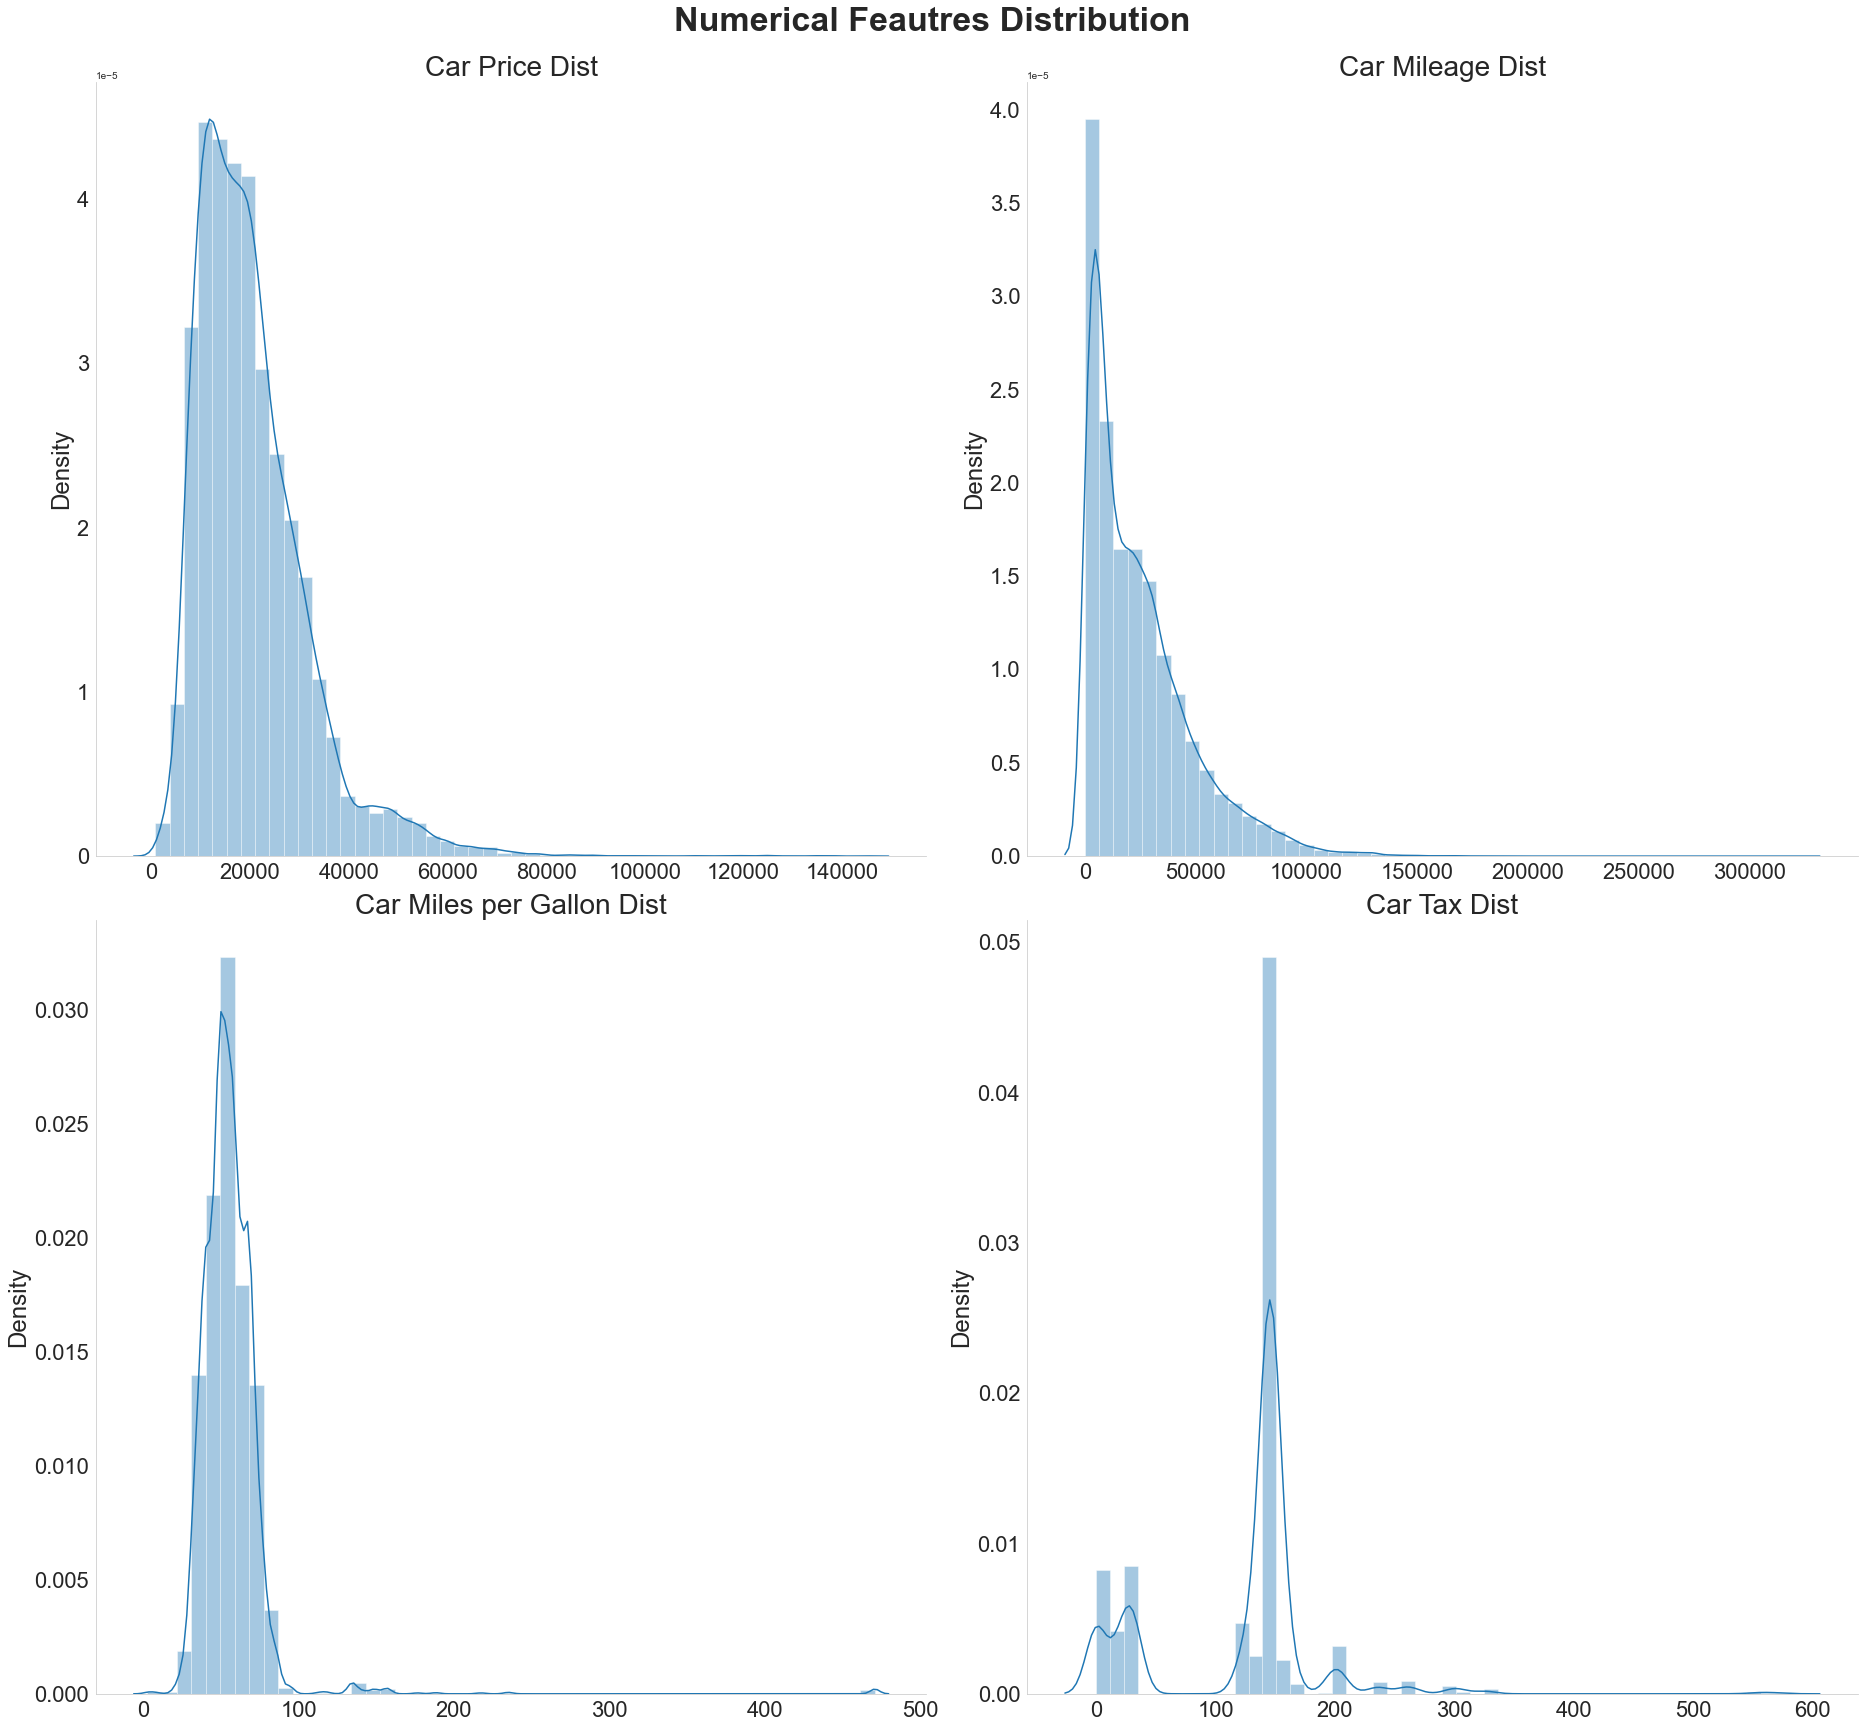

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(26,24))
fig.suptitle("Numerical Feautres Distribution", fontsize=34,fontweight='bold', verticalalignment="bottom")

#Plot 1
plt.subplot(2,2,1)
ax1 = sns.distplot(x = cars['price'], kde = True, ax=ax1)
ax1.set_ylabel('Density',fontsize=24,fontweight='normal')    
plt.xticks( fontsize=22)
plt.yticks( fontsize=22)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_title('Car Price Dist',fontsize=28, fontweight='normal')

# Plot 2
plt.subplot(2,2,2)
ax2 = sns.distplot(x = cars['mileage'], kde = True, ax=ax2)
ax2.set_ylabel('Density',fontsize=24,fontweight='normal')    
plt.xticks( fontsize=22)
plt.yticks( fontsize=22)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_title('Car Mileage Dist',fontsize=28, fontweight='normal')

# Plot 3
plt.subplot(2,2,3)
ax3 = sns.distplot(x = cars['mpg'], kde = True, ax=ax3)
ax3.set_ylabel('Density',fontsize=24,fontweight='normal')    
plt.xticks( fontsize=22)
plt.yticks( fontsize=22)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.set_title('Car Miles per Gallon Dist',fontsize=28, fontweight='normal')

# Plot 4
plt.subplot(2,2,4)
ax4 = sns.distplot(x = cars['tax'], kde = True, ax=ax4)
ax4.set_ylabel('Density',fontsize=24,fontweight='normal')    
plt.xticks( fontsize=22)
plt.yticks( fontsize=22)
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.set_title('Car Tax Dist',fontsize=28, fontweight='normal')

plt.tight_layout()

###  `BMW Car Brand`  

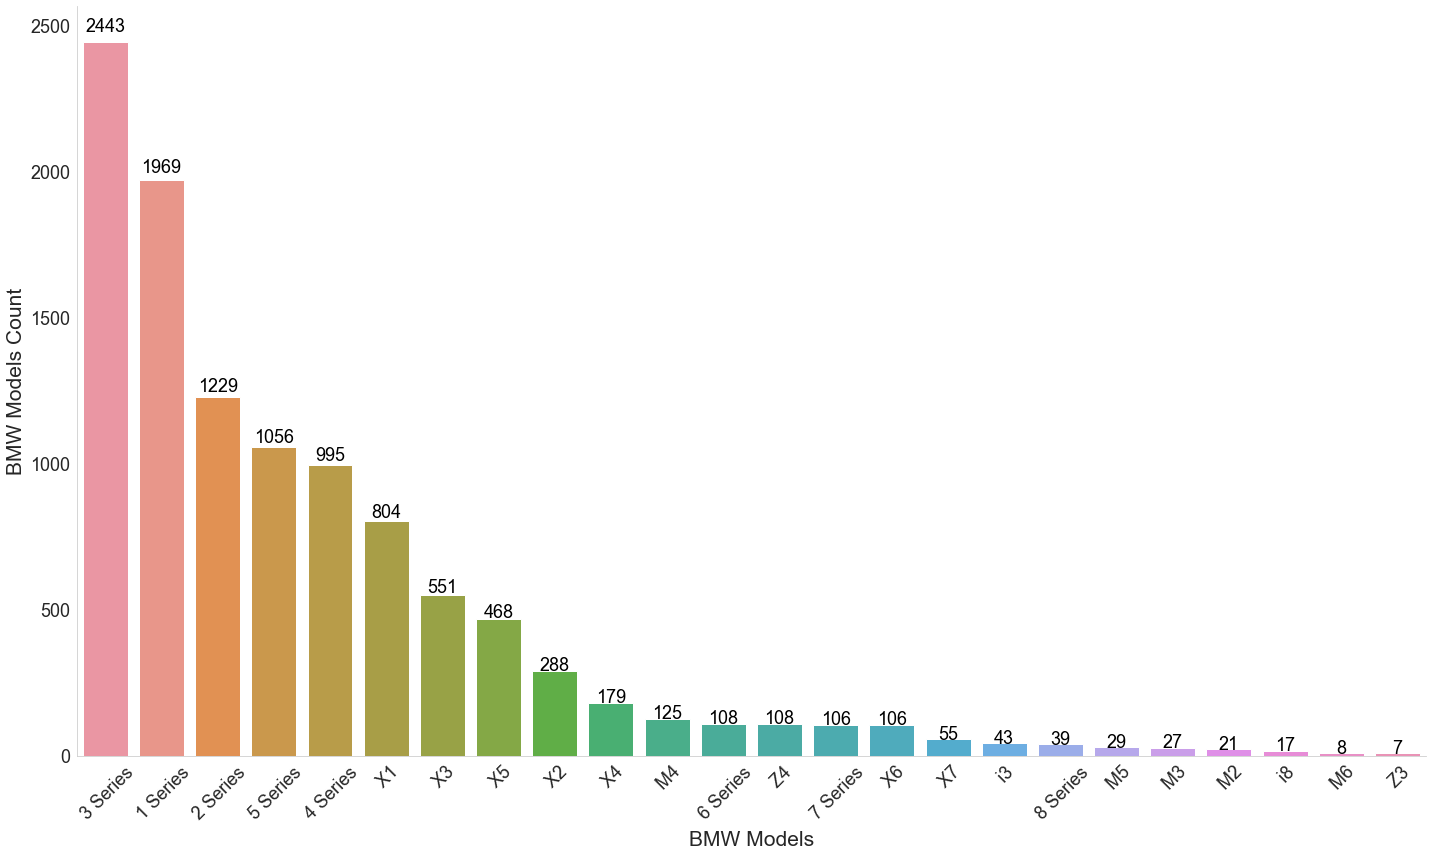

In [19]:
car_bmw = cars.loc[cars['Car Brand'] == 'BMW']

#Plot 
fig13=plt.figure(figsize=(20,12))
ax13 = sns.countplot(x = 'model',data = car_bmw, order=car_bmw['model'].value_counts().index)
for i in ax13.patches:    
    ax13.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.015,
            s = f"{i.get_height()}", 
            ha = 'center', size = 18, rotation = 0, color = 'black')
ax13.set_ylabel('BMW Models Count',fontsize=21,fontweight='normal') 
ax13.set_xlabel('BMW Models',fontsize=21,fontweight='normal') 
plt.xticks( fontsize=18,rotation=45)
plt.yticks( fontsize=18)
ax13.spines['right'].set_visible(False)
ax13.spines['top'].set_visible(False)

plt.tight_layout()

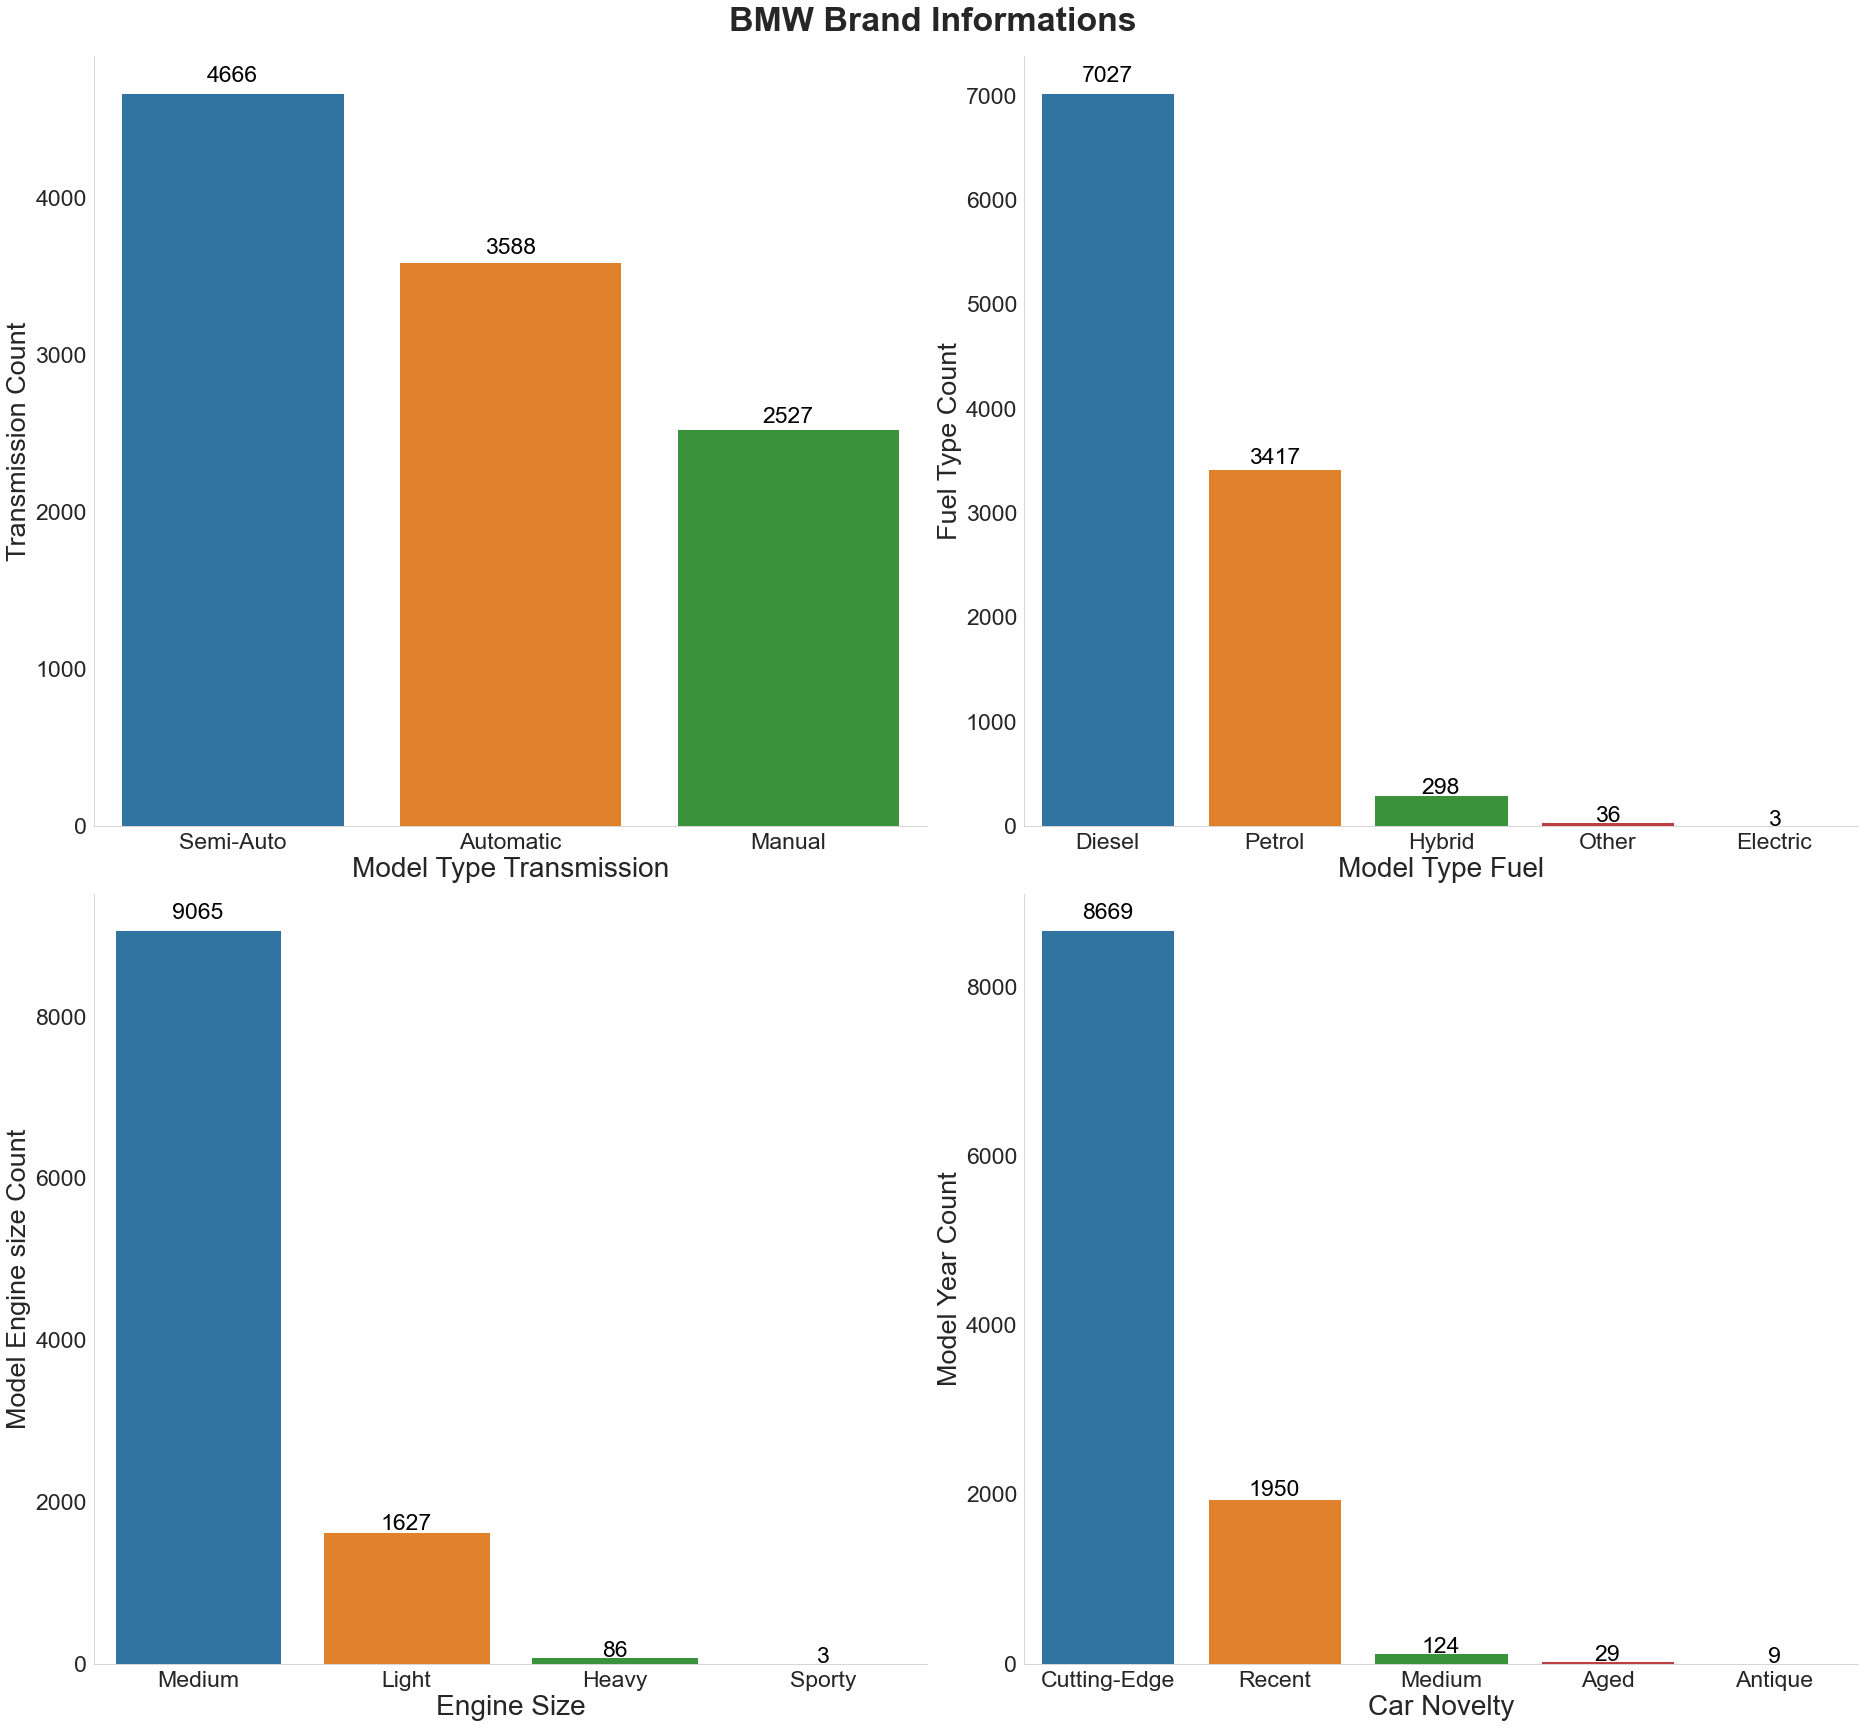

In [20]:
fig, ((ax5, ax6), (ax7, ax8)) = plt.subplots(2,2,figsize=(26,24))
fig.suptitle("BMW Brand Informations", fontsize=34,fontweight='bold', verticalalignment="bottom")

#Plot 1 
plt.subplot(2,2,1)
ax5 = sns.countplot(x = 'transmission',data = car_bmw, ax=ax5, order=car_bmw['transmission'].value_counts().index)
for i in ax5.patches:    
    ax5.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.015,
            s = f"{i.get_height()}", 
            ha = 'center', size = 23, rotation = 0, color = 'black')
ax5.set_xlabel('Model Type Transmission',fontsize=28,fontweight='normal') 
ax5.set_ylabel('Transmission Count',fontsize=27,fontweight='normal')    
plt.xticks( fontsize=23)
plt.yticks( fontsize=23)
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)

#Plot 2
plt.subplot(2,2,2)
ax6 = sns.countplot(x = 'fuelType',data = car_bmw, ax=ax6, order=car_bmw['fuelType'].value_counts().index)
for i in ax6.patches:    
    ax6.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.015,
            s = f"{i.get_height()}", 
            ha = 'center', size = 23, rotation = 0, color = 'black')
ax6.set_ylabel('Fuel Type Count',fontsize=27,fontweight='normal')  
ax6.set_xlabel('Model Type Fuel',fontsize=28,fontweight='normal') 
plt.xticks( fontsize=23)
plt.yticks( fontsize=23)
ax6.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)

#Plot 3
plt.subplot(2,2,3)
ax7 = sns.countplot(x = 'Engine Size Level',data = car_bmw, ax=ax7, order=car_bmw['Engine Size Level'].value_counts().index)
for i in ax7.patches:    
    ax7.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.015,
            s = f"{i.get_height()}", 
            ha = 'center', size = 23, rotation = 0, color = 'black')
ax7.set_ylabel('Model Engine size Count',fontsize=27,fontweight='normal') 
ax7.set_xlabel('Engine Size',fontsize=28,fontweight='normal') 
plt.xticks( fontsize=23)
plt.yticks( fontsize=23)
ax7.spines['right'].set_visible(False)
ax7.spines['top'].set_visible(False)

#Plot 4
plt.subplot(2,2,4)
ax8 = sns.countplot(x = 'Car Novelty',data = car_bmw, ax=ax8, order=car_bmw['Car Novelty'].value_counts().index)
for i in ax8.patches:    
    ax8.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.015,
            s = f"{i.get_height()}", 
            ha = 'center', size = 23, rotation = 0, color = 'black')
ax8.set_ylabel('Model Year Count',fontsize=27,fontweight='normal') 
ax8.set_xlabel('Car Novelty',fontsize=28,fontweight='normal') 
plt.xticks( fontsize=23)
plt.yticks( fontsize=23)
ax8.spines['right'].set_visible(False)
ax8.spines['top'].set_visible(False)

plt.tight_layout()

C:\Users\GIGABYTE\anaconda3\envs\GIGABYTE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\GIGABYTE\anaconda3\envs\GIGABYTE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\GIGABYTE\anaconda3\envs\GIGABYTE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

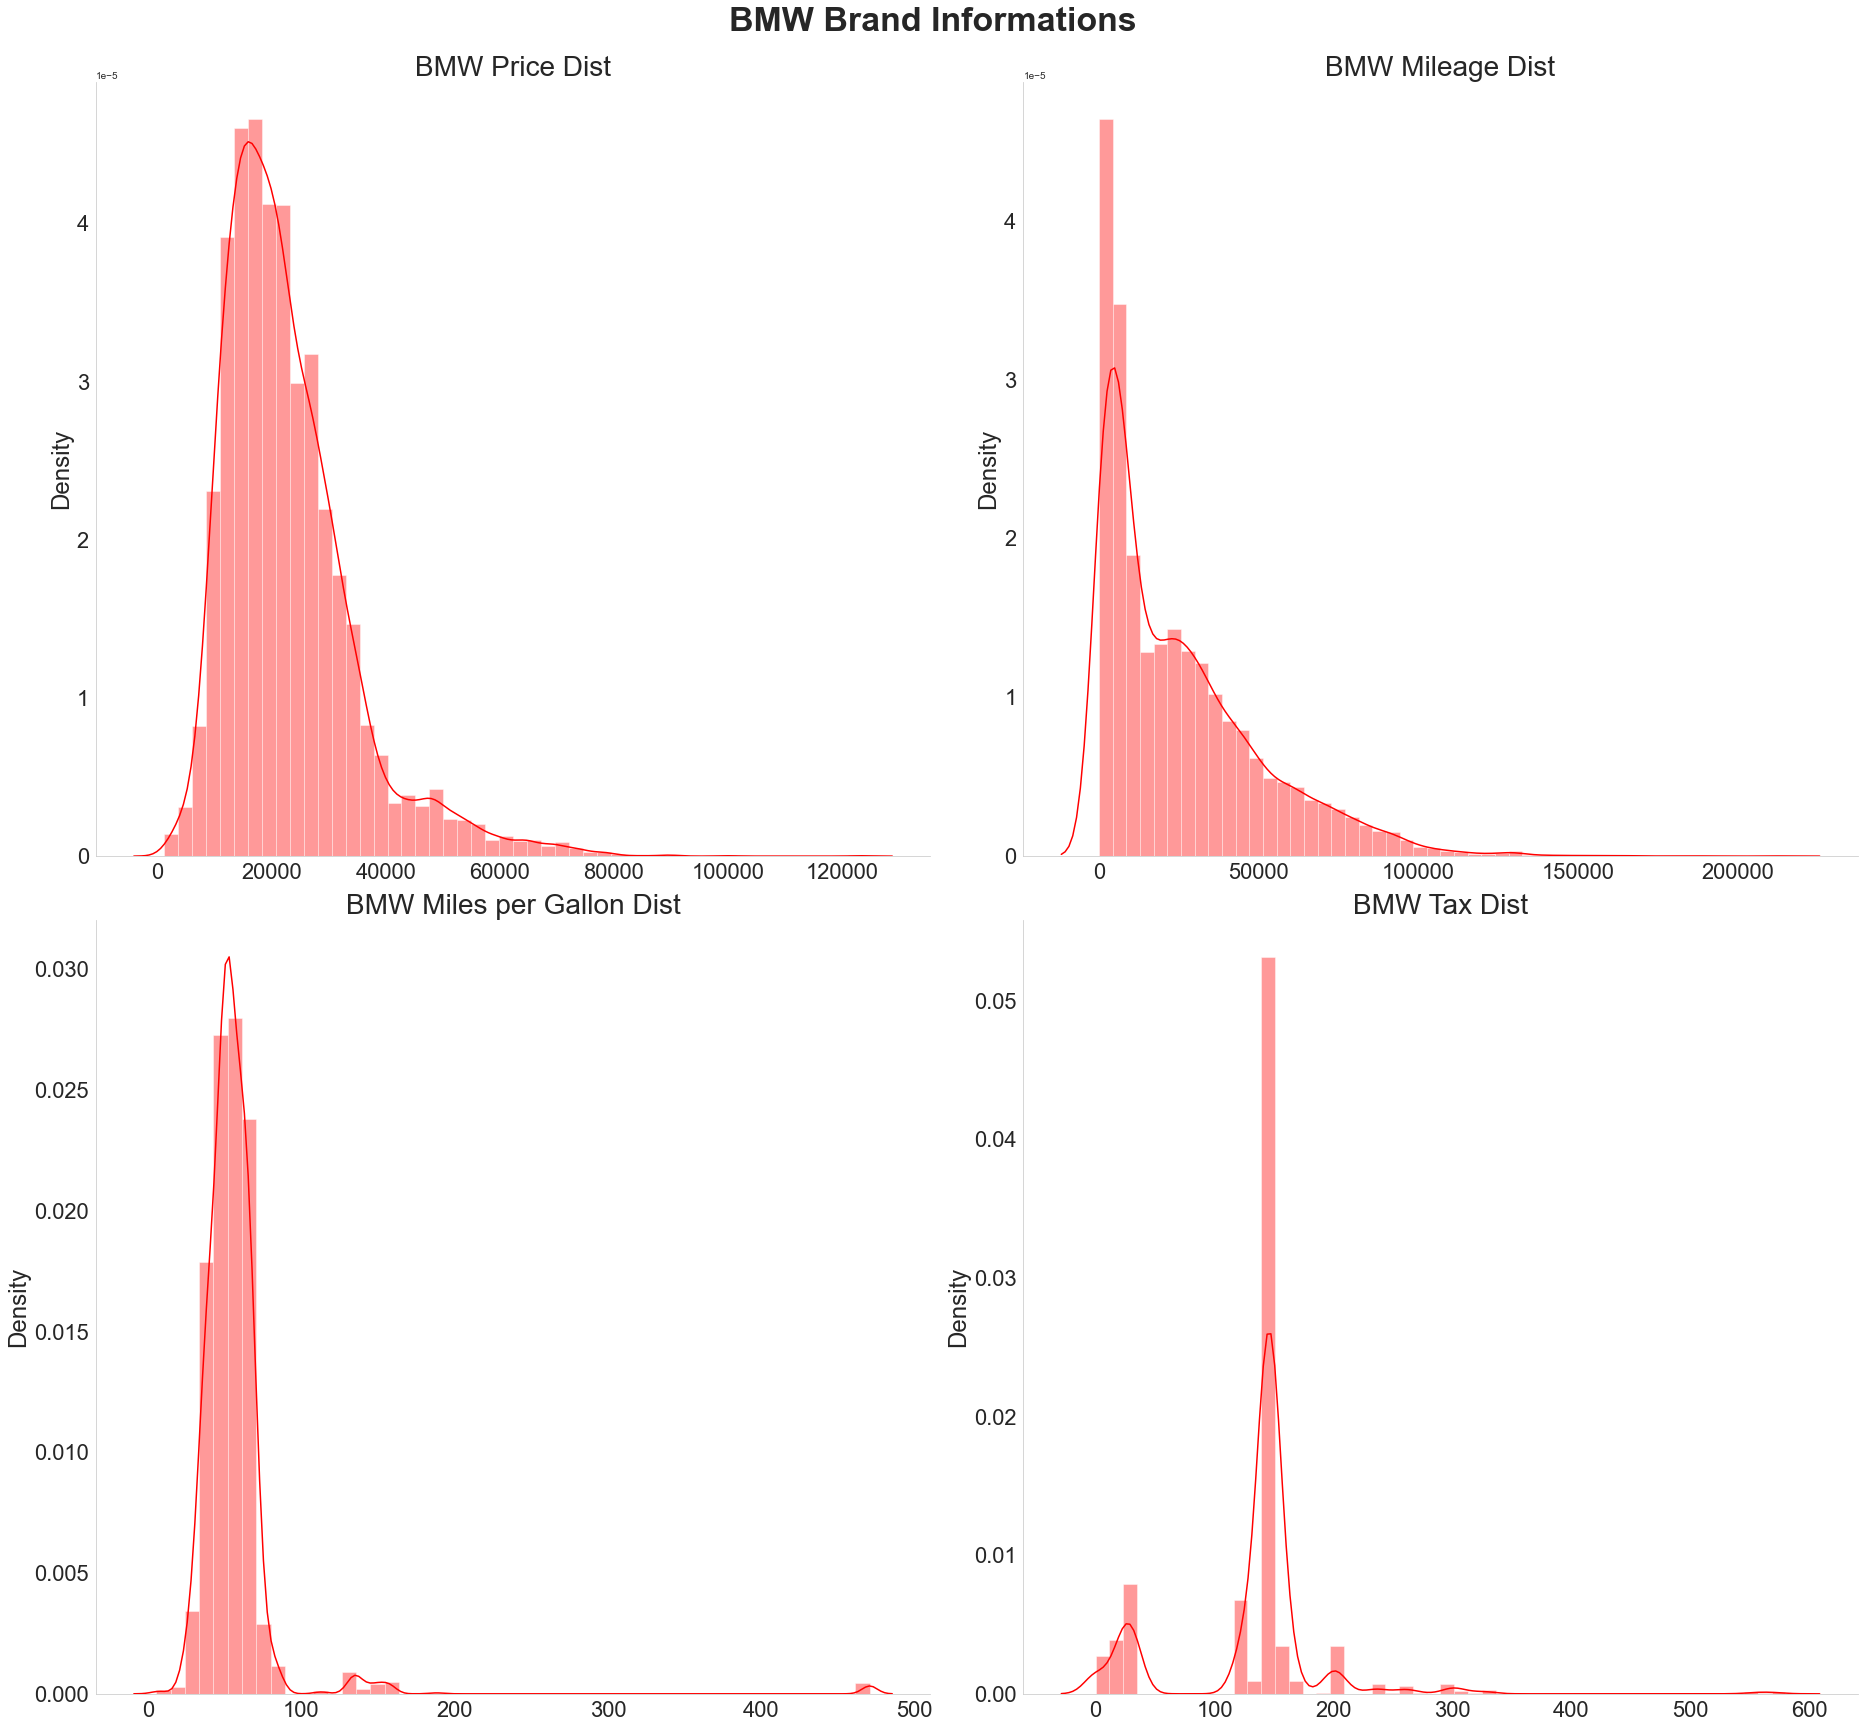

In [21]:
fig, ((ax9, ax10), (ax11, ax12)) = plt.subplots(2,2,figsize=(26,24))
fig.suptitle("BMW Brand Informations", fontsize=34,fontweight='bold', verticalalignment="bottom")

#Plot 1
plt.subplot(2,2,1)
ax9 = sns.distplot(x = car_bmw['price'], kde = True, ax=ax9, color = 'red')
ax9.set_ylabel('Density',fontsize=24,fontweight='normal')    
plt.xticks( fontsize=22)
plt.yticks( fontsize=22)
ax9.spines['right'].set_visible(False)
ax9.spines['top'].set_visible(False)
ax9.set_title('BMW Price Dist',fontsize=28, fontweight='normal')

# Plot 2
plt.subplot(2,2,2)
ax10 = sns.distplot(x = car_bmw['mileage'], kde = True, ax=ax10, color = 'red')
ax10.set_ylabel('Density',fontsize=24,fontweight='normal')    
plt.xticks( fontsize=22)
plt.yticks( fontsize=22)
ax10.spines['right'].set_visible(False)
ax10.spines['top'].set_visible(False)
ax10.set_title('BMW Mileage Dist',fontsize=28, fontweight='normal')

# Plot 3
plt.subplot(2,2,3)
ax11 = sns.distplot(x = car_bmw['mpg'], kde = True, ax=ax11, color='red')
ax11.set_ylabel('Density',fontsize=24,fontweight='normal')    
plt.xticks( fontsize=22)
plt.yticks( fontsize=22)
ax11.spines['right'].set_visible(False)
ax11.spines['top'].set_visible(False)
ax11.set_title('BMW Miles per Gallon Dist',fontsize=28, fontweight='normal')

# Plot 4
plt.subplot(2,2,4)
ax12 = sns.distplot(x = car_bmw['tax'], kde = True, ax=ax12,color='red')
ax12.set_ylabel('Density',fontsize=24,fontweight='normal')    
plt.xticks( fontsize=22)
plt.yticks( fontsize=22)
ax12.spines['right'].set_visible(False)
ax12.spines['top'].set_visible(False)
ax12.set_title('BMW Tax Dist',fontsize=28, fontweight='normal')

plt.tight_layout()

### `Audi Car Brand`

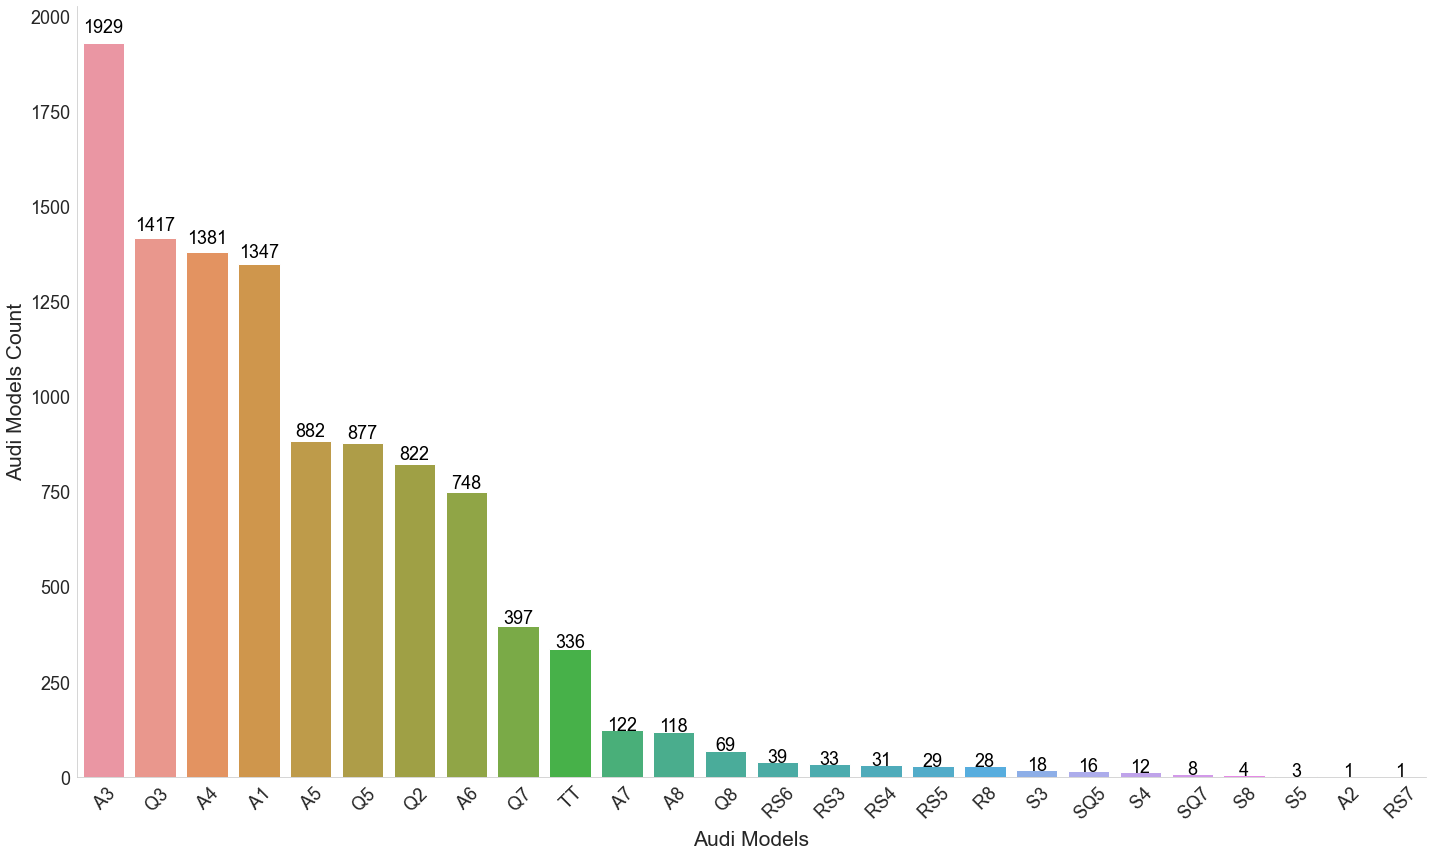

In [22]:
car_aud = cars.loc[cars['Car Brand'] == 'Audi']

#Plot 
fig14=plt.figure(figsize=(20,12))
ax14 = sns.countplot(x = 'model',data = car_aud, order=car_aud['model'].value_counts().index)
for i in ax14.patches:    
    ax14.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.015,
            s = f"{i.get_height()}", 
            ha = 'center', size = 18, rotation = 0, color = 'black')
ax14.set_ylabel('Audi Models Count',fontsize=21,fontweight='normal') 
ax14.set_xlabel('Audi Models',fontsize=21,fontweight='normal') 
plt.xticks( fontsize=18,rotation=45)
plt.yticks( fontsize=18)
ax14.spines['right'].set_visible(False)
ax14.spines['top'].set_visible(False)

plt.tight_layout()

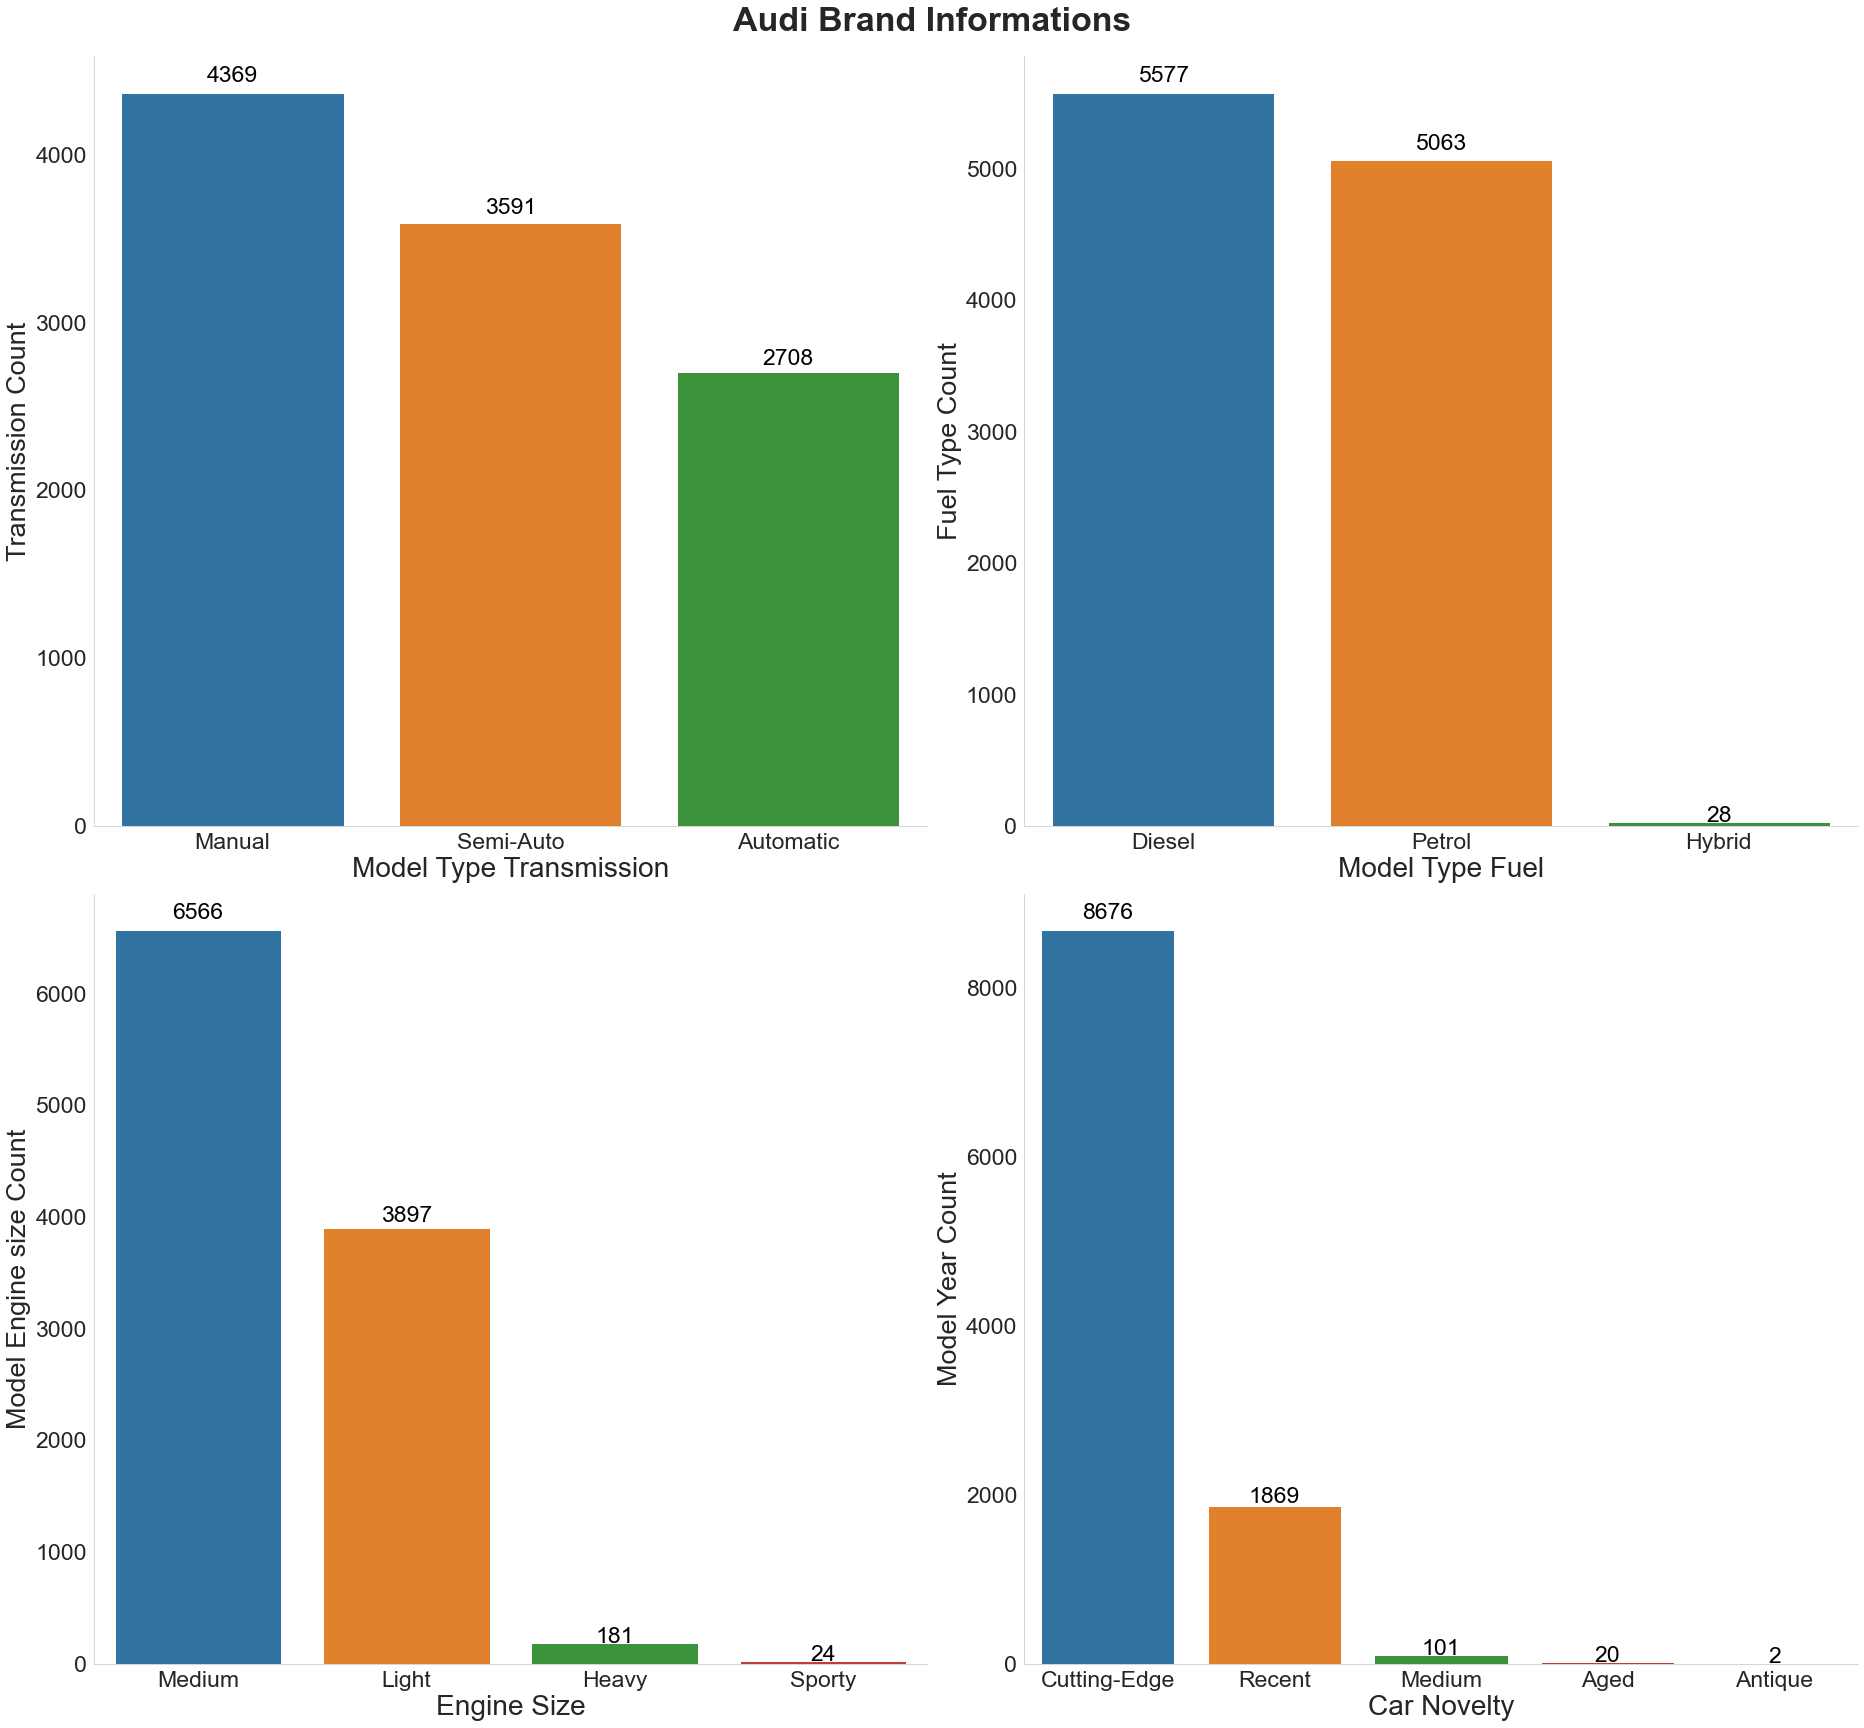

In [23]:
fig, ((ax15, ax16), (ax17, ax18)) = plt.subplots(2,2,figsize=(26,24))
fig.suptitle("Audi Brand Informations", fontsize=34,fontweight='bold', verticalalignment="bottom")

#Plot 1 
plt.subplot(2,2,1)
ax15 = sns.countplot(x = 'transmission',data = car_aud, ax=ax15, order=car_aud['transmission'].value_counts().index)
for i in ax15.patches:    
    ax15.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.015,
            s = f"{i.get_height()}", 
            ha = 'center', size = 23, rotation = 0, color = 'black')
ax15.set_xlabel('Model Type Transmission',fontsize=28,fontweight='normal') 
ax15.set_ylabel('Transmission Count',fontsize=27,fontweight='normal')    
plt.xticks( fontsize=23)
plt.yticks( fontsize=23)
ax15.spines['right'].set_visible(False)
ax15.spines['top'].set_visible(False)

#Plot 2
plt.subplot(2,2,2)
ax16 = sns.countplot(x = 'fuelType',data = car_aud, ax=ax16, order=car_aud['fuelType'].value_counts().index)
for i in ax16.patches:    
    ax16.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.015,
            s = f"{i.get_height()}", 
            ha = 'center', size = 23, rotation = 0, color = 'black')
ax16.set_ylabel('Fuel Type Count',fontsize=27,fontweight='normal')  
ax16.set_xlabel('Model Type Fuel',fontsize=28,fontweight='normal') 
plt.xticks( fontsize=23)
plt.yticks( fontsize=23)
ax16.spines['right'].set_visible(False)
ax16.spines['top'].set_visible(False)

#Plot 3
plt.subplot(2,2,3)
ax17 = sns.countplot(x = 'Engine Size Level',data = car_aud, ax=ax17, order=car_aud['Engine Size Level'].value_counts().index)
for i in ax17.patches:    
    ax17.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.015,
            s = f"{i.get_height()}", 
            ha = 'center', size = 23, rotation = 0, color = 'black')
ax17.set_ylabel('Model Engine size Count',fontsize=27,fontweight='normal') 
ax17.set_xlabel('Engine Size',fontsize=28,fontweight='normal') 
plt.xticks( fontsize=23)
plt.yticks( fontsize=23)
ax17.spines['right'].set_visible(False)
ax17.spines['top'].set_visible(False)

#Plot 4
plt.subplot(2,2,4)
ax18 = sns.countplot(x = 'Car Novelty',data = car_aud, ax=ax18, order=car_aud['Car Novelty'].value_counts().index)
for i in ax18.patches:    
    ax18.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.015,
            s = f"{i.get_height()}", 
            ha = 'center', size = 23, rotation = 0, color = 'black')
ax18.set_ylabel('Model Year Count',fontsize=27,fontweight='normal') 
ax18.set_xlabel('Car Novelty',fontsize=28,fontweight='normal') 
plt.xticks( fontsize=23)
plt.yticks( fontsize=23)
ax18.spines['right'].set_visible(False)
ax18.spines['top'].set_visible(False)

plt.tight_layout()

C:\Users\GIGABYTE\anaconda3\envs\GIGABYTE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\GIGABYTE\anaconda3\envs\GIGABYTE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\GIGABYTE\anaconda3\envs\GIGABYTE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

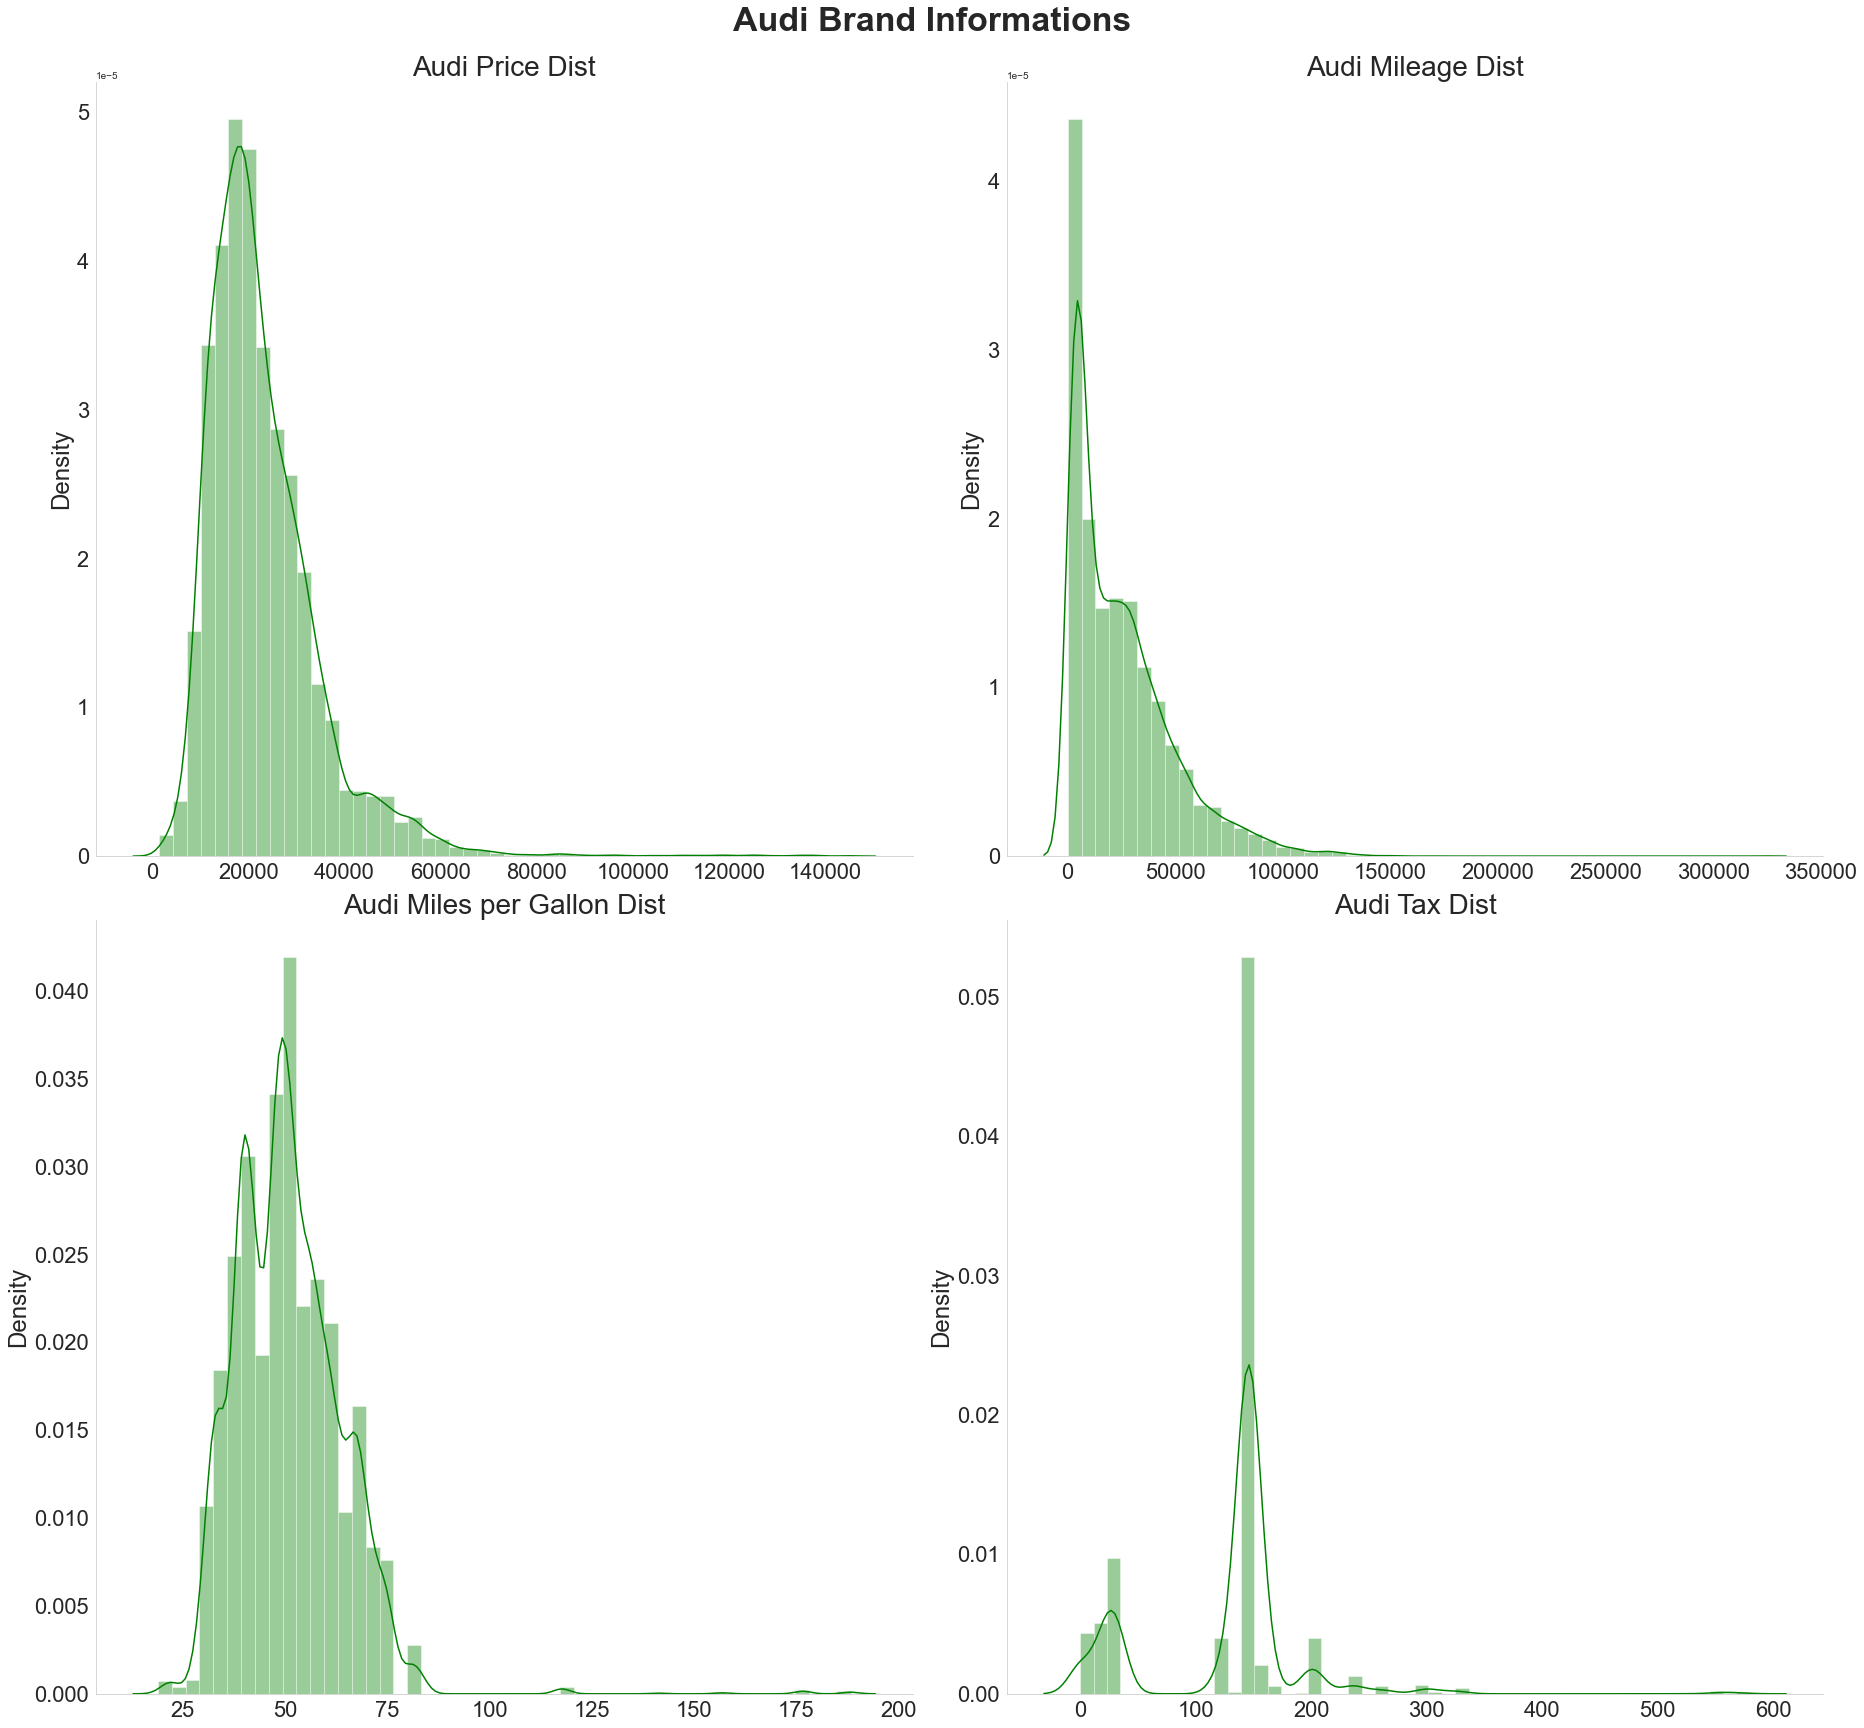

In [24]:
fig, ((ax19, ax20), (ax21, ax22)) = plt.subplots(2,2,figsize=(26,24))
fig.suptitle("Audi Brand Informations", fontsize=34,fontweight='bold', verticalalignment="bottom")

#Plot 1
plt.subplot(2,2,1)
ax19 = sns.distplot(x = car_aud['price'], kde = True, ax=ax19, color = 'green')
ax19.set_ylabel('Density',fontsize=24,fontweight='normal')    
plt.xticks( fontsize=22)
plt.yticks( fontsize=22)
ax19.spines['right'].set_visible(False)
ax19.spines['top'].set_visible(False)
ax19.set_title('Audi Price Dist',fontsize=28, fontweight='normal')

# Plot 2
plt.subplot(2,2,2)
ax20 = sns.distplot(x = car_aud['mileage'], kde = True, ax=ax20, color = 'green')
ax20.set_ylabel('Density',fontsize=24,fontweight='normal')    
plt.xticks( fontsize=22)
plt.yticks( fontsize=22)
ax20.spines['right'].set_visible(False)
ax20.spines['top'].set_visible(False)
ax20.set_title('Audi Mileage Dist',fontsize=28, fontweight='normal')

# Plot 3
plt.subplot(2,2,3)
ax21 = sns.distplot(x = car_aud['mpg'], kde = True, ax=ax21, color='green')
ax21.set_ylabel('Density',fontsize=24,fontweight='normal')    
plt.xticks( fontsize=22)
plt.yticks( fontsize=22)
ax21.spines['right'].set_visible(False)
ax21.spines['top'].set_visible(False)
ax21.set_title('Audi Miles per Gallon Dist',fontsize=28, fontweight='normal')

# Plot 4
plt.subplot(2,2,4)
ax22 = sns.distplot(x = car_aud['tax'], kde = True, ax=ax22,color='green')
ax22.set_ylabel('Density',fontsize=24,fontweight='normal')    
plt.xticks( fontsize=22)
plt.yticks( fontsize=22)
ax22.spines['right'].set_visible(False)
ax22.spines['top'].set_visible(False)
ax22.set_title('Audi Tax Dist',fontsize=28, fontweight='normal')

plt.tight_layout()

### `Toyota Car Brand` 

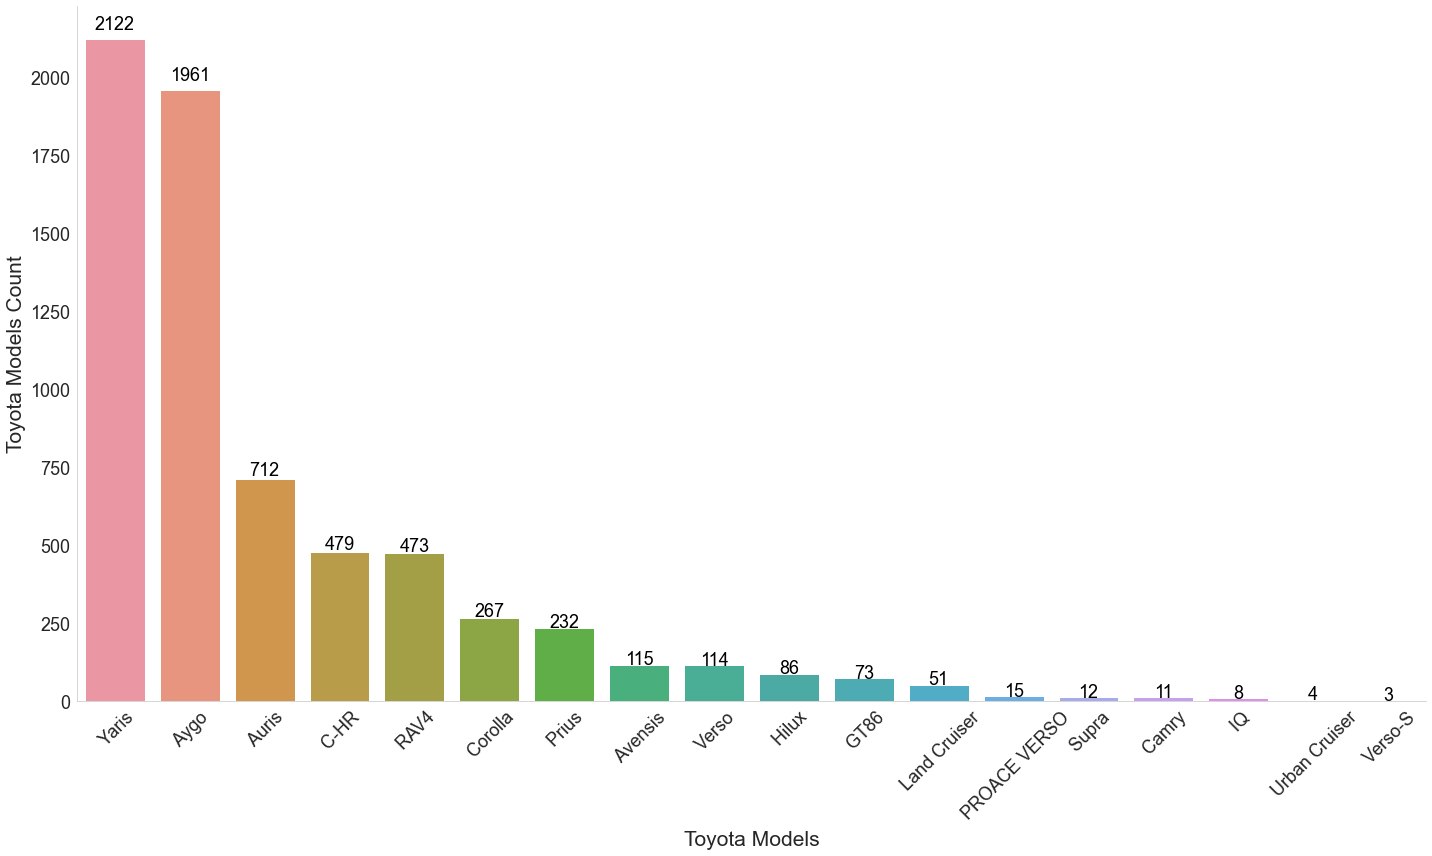

In [25]:
car_toy = cars.loc[cars['Car Brand'] == 'Toyota']

#Plot 
fig23=plt.figure(figsize=(20,12))
ax23 = sns.countplot(x = 'model',data = car_toy, order=car_toy['model'].value_counts().index)
for i in ax23.patches:    
    ax23.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.015,
            s = f"{i.get_height()}", 
            ha = 'center', size = 18, rotation = 0, color = 'black')
ax23.set_ylabel('Toyota Models Count',fontsize=21,fontweight='normal') 
ax23.set_xlabel('Toyota Models',fontsize=21,fontweight='normal') 
plt.xticks( fontsize=18,rotation=45)
plt.yticks( fontsize=18)
ax23.spines['right'].set_visible(False)
ax23.spines['top'].set_visible(False)

plt.tight_layout()

posx and posy should be finite values
posx and posy should be finite values


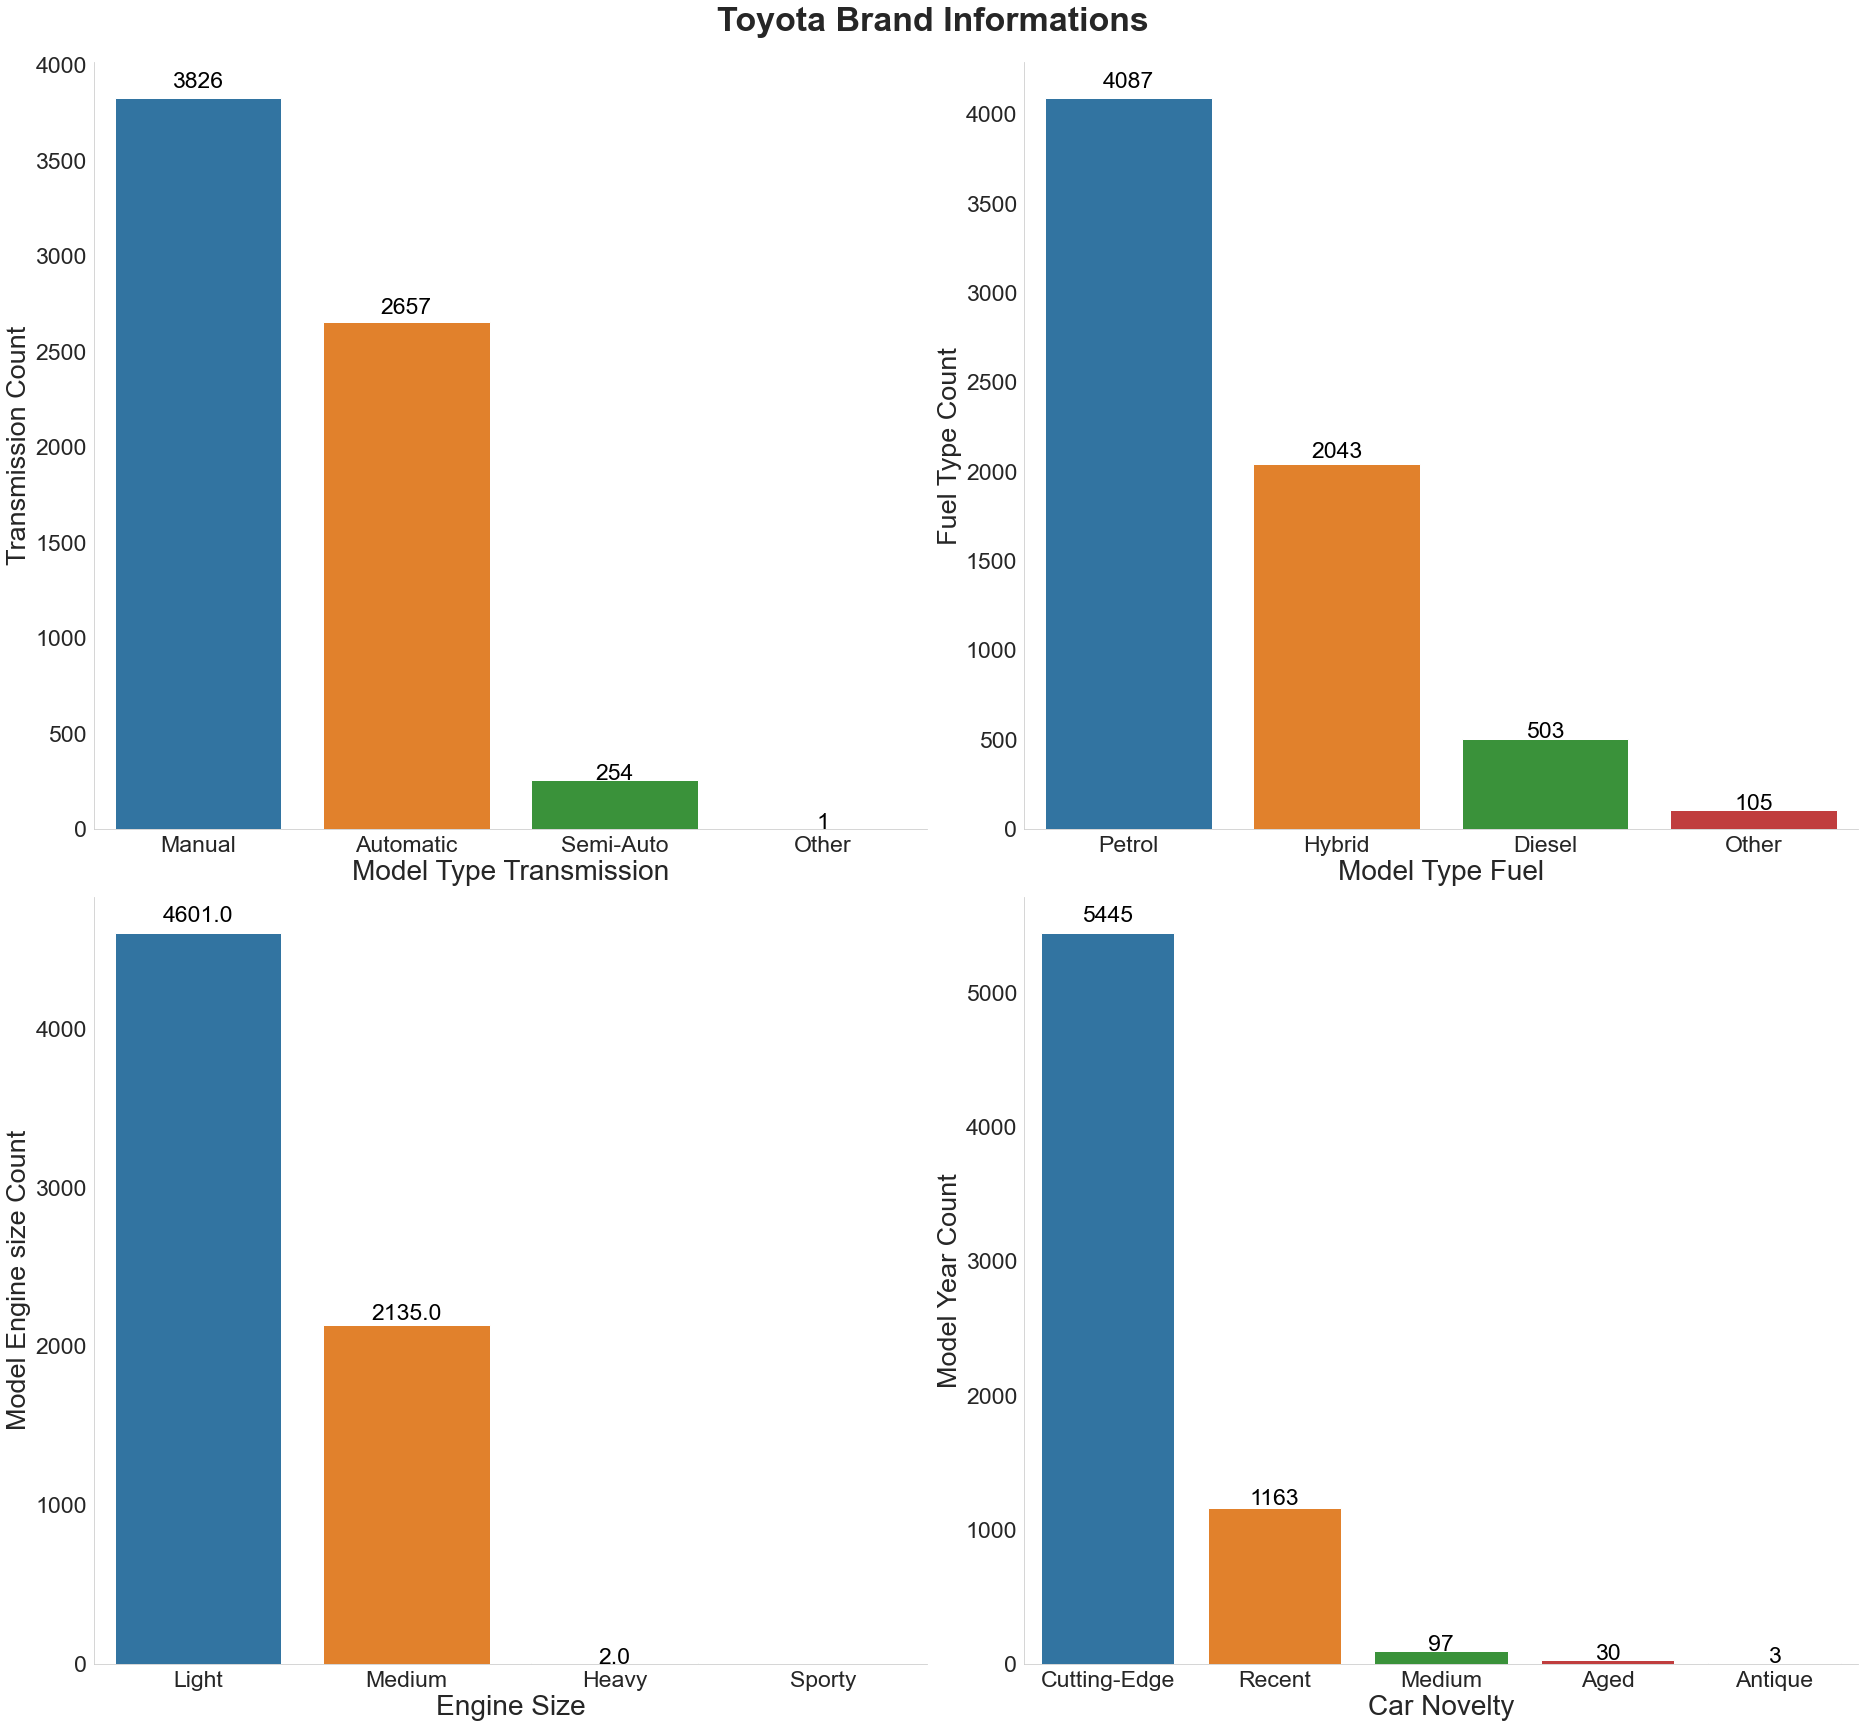

In [26]:
fig, ((ax25, ax26), (ax27, ax28)) = plt.subplots(2,2,figsize=(26,24))
fig.suptitle("Toyota Brand Informations", fontsize=34,fontweight='bold', verticalalignment="bottom")

#Plot 1 
plt.subplot(2,2,1)
ax25 = sns.countplot(x = 'transmission',data = car_toy, ax=ax25, order=car_toy['transmission'].value_counts().index)
for i in ax25.patches:    
    ax25.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.015,
            s = f"{i.get_height()}", 
            ha = 'center', size = 23, rotation = 0, color = 'black')
ax25.set_xlabel('Model Type Transmission',fontsize=28,fontweight='normal') 
ax25.set_ylabel('Transmission Count',fontsize=27,fontweight='normal')    
plt.xticks( fontsize=23)
plt.yticks( fontsize=23)
ax25.spines['right'].set_visible(False)
ax25.spines['top'].set_visible(False)

#Plot 2
plt.subplot(2,2,2)
ax26 = sns.countplot(x = 'fuelType',data = car_toy, ax=ax26, order=car_toy['fuelType'].value_counts().index)
for i in ax26.patches:    
    ax26.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.015,
            s = f"{i.get_height()}", 
            ha = 'center', size = 23, rotation = 0, color = 'black')
ax26.set_ylabel('Fuel Type Count',fontsize=27,fontweight='normal')  
ax26.set_xlabel('Model Type Fuel',fontsize=28,fontweight='normal') 
plt.xticks( fontsize=23)
plt.yticks( fontsize=23)
ax26.spines['right'].set_visible(False)
ax26.spines['top'].set_visible(False)

#Plot 3
plt.subplot(2,2,3)
ax27 = sns.countplot(x = 'Engine Size Level',data = car_toy, ax=ax27, order=car_toy['Engine Size Level'].value_counts().index)
for i in ax27.patches:    
    ax27.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.015,
            s = f"{i.get_height()}", 
            ha = 'center', size = 23, rotation = 0, color = 'black')
ax27.set_ylabel('Model Engine size Count',fontsize=27,fontweight='normal') 
ax27.set_xlabel('Engine Size',fontsize=28,fontweight='normal') 
plt.xticks( fontsize=23)
plt.yticks( fontsize=23)
ax27.spines['right'].set_visible(False)
ax27.spines['top'].set_visible(False)

#Plot 4
plt.subplot(2,2,4)
ax28 = sns.countplot(x = 'Car Novelty',data = car_toy, ax=ax28, order=car_toy['Car Novelty'].value_counts().index)
for i in ax28.patches:    
    ax28.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.015,
            s = f"{i.get_height()}", 
            ha = 'center', size = 23, rotation = 0, color = 'black')
ax28.set_ylabel('Model Year Count',fontsize=27,fontweight='normal') 
ax28.set_xlabel('Car Novelty',fontsize=28,fontweight='normal') 
plt.xticks( fontsize=23)
plt.yticks( fontsize=23)
ax28.spines['right'].set_visible(False)
ax28.spines['top'].set_visible(False)

plt.tight_layout()

C:\Users\GIGABYTE\anaconda3\envs\GIGABYTE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\GIGABYTE\anaconda3\envs\GIGABYTE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\GIGABYTE\anaconda3\envs\GIGABYTE\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

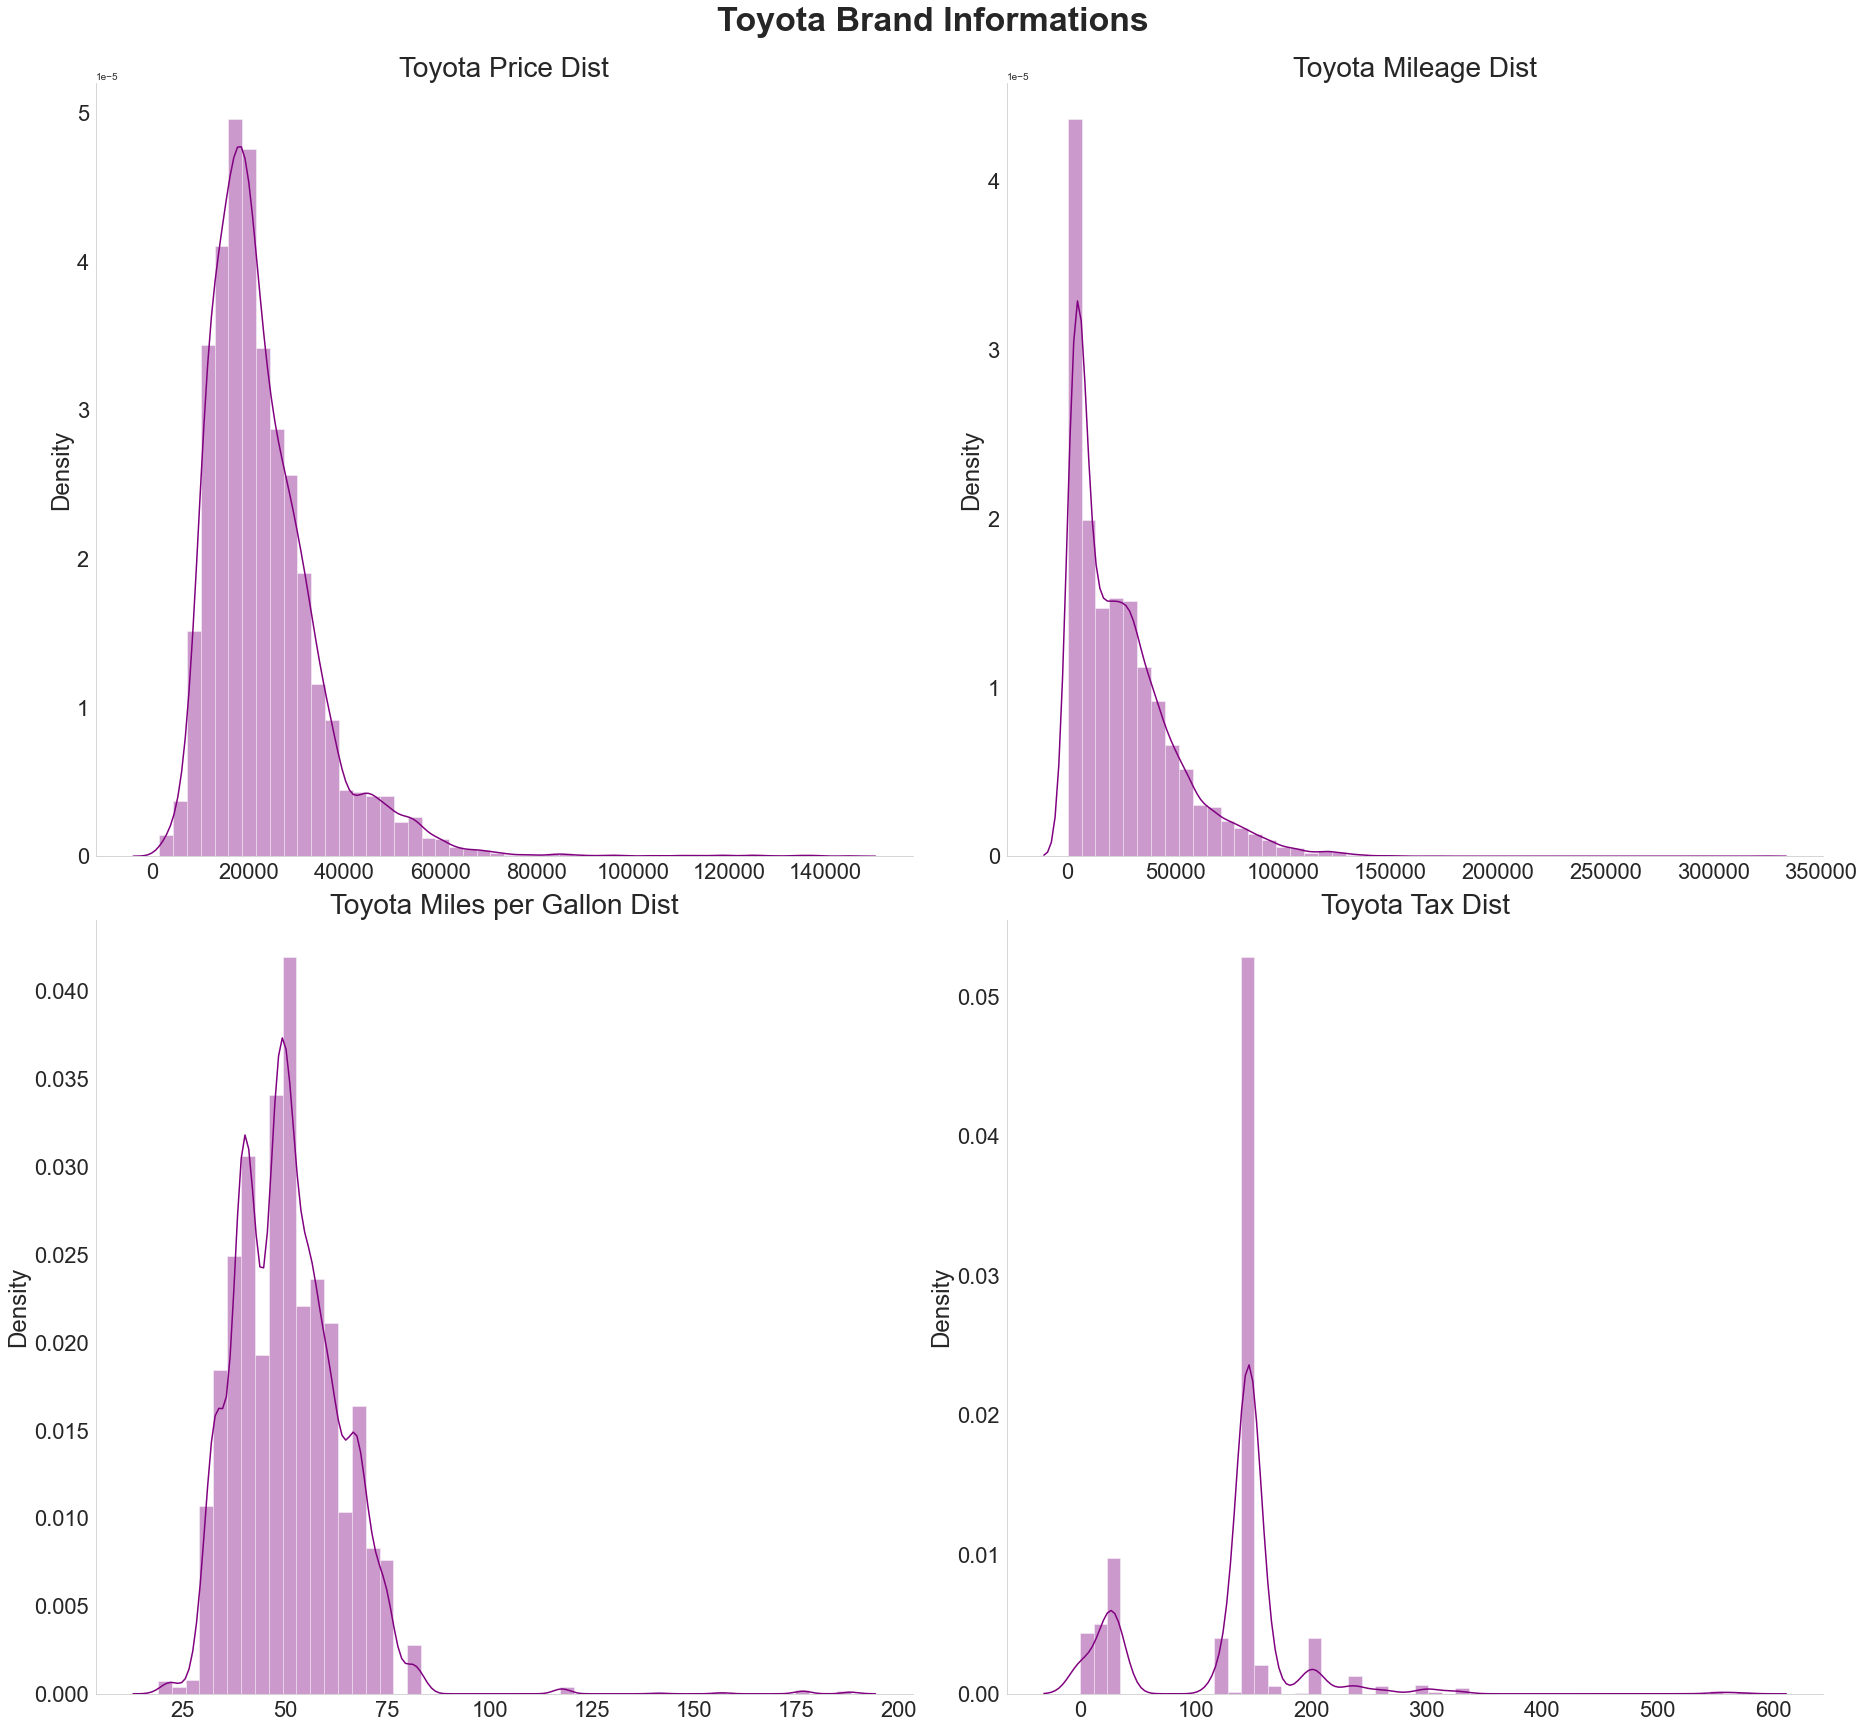

In [27]:
fig, ((ax29, ax30), (ax31, ax32)) = plt.subplots(2,2,figsize=(26,24))
fig.suptitle("Toyota Brand Informations", fontsize=34,fontweight='bold', verticalalignment="bottom")

#Plot 1
plt.subplot(2,2,1)
ax29 = sns.distplot(x = car_aud['price'], kde = True, ax=ax29, color = 'purple')
ax29.set_ylabel('Density',fontsize=24,fontweight='normal')    
plt.xticks( fontsize=22)
plt.yticks( fontsize=22)
ax29.spines['right'].set_visible(False)
ax29.spines['top'].set_visible(False)
ax29.set_title('Toyota Price Dist',fontsize=28, fontweight='normal')

# Plot 2
plt.subplot(2,2,2)
ax30 = sns.distplot(x = car_aud['mileage'], kde = True, ax=ax30, color = 'purple')
ax30.set_ylabel('Density',fontsize=24,fontweight='normal')    
plt.xticks( fontsize=22)
plt.yticks( fontsize=22)
ax30.spines['right'].set_visible(False)
ax30.spines['top'].set_visible(False)
ax30.set_title('Toyota Mileage Dist',fontsize=28, fontweight='normal')

# Plot 3
plt.subplot(2,2,3)
ax31 = sns.distplot(x = car_aud['mpg'], kde = True, ax=ax31, color='purple')
ax31.set_ylabel('Density',fontsize=24,fontweight='normal')    
plt.xticks( fontsize=22)
plt.yticks( fontsize=22)
ax31.spines['right'].set_visible(False)
ax31.spines['top'].set_visible(False)
ax31.set_title('Toyota Miles per Gallon Dist',fontsize=28, fontweight='normal')

# Plot 4
plt.subplot(2,2,4)
ax32 = sns.distplot(x = car_aud['tax'], kde = True, ax=ax32,color='purple')
ax32.set_ylabel('Density',fontsize=24,fontweight='normal')    
plt.xticks( fontsize=22)
plt.yticks( fontsize=22)
ax32.spines['right'].set_visible(False)
ax32.spines['top'].set_visible(False)
ax32.set_title('Toyota Tax Dist',fontsize=28, fontweight='normal')

plt.tight_layout()

### All `Car Brand` Compared

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


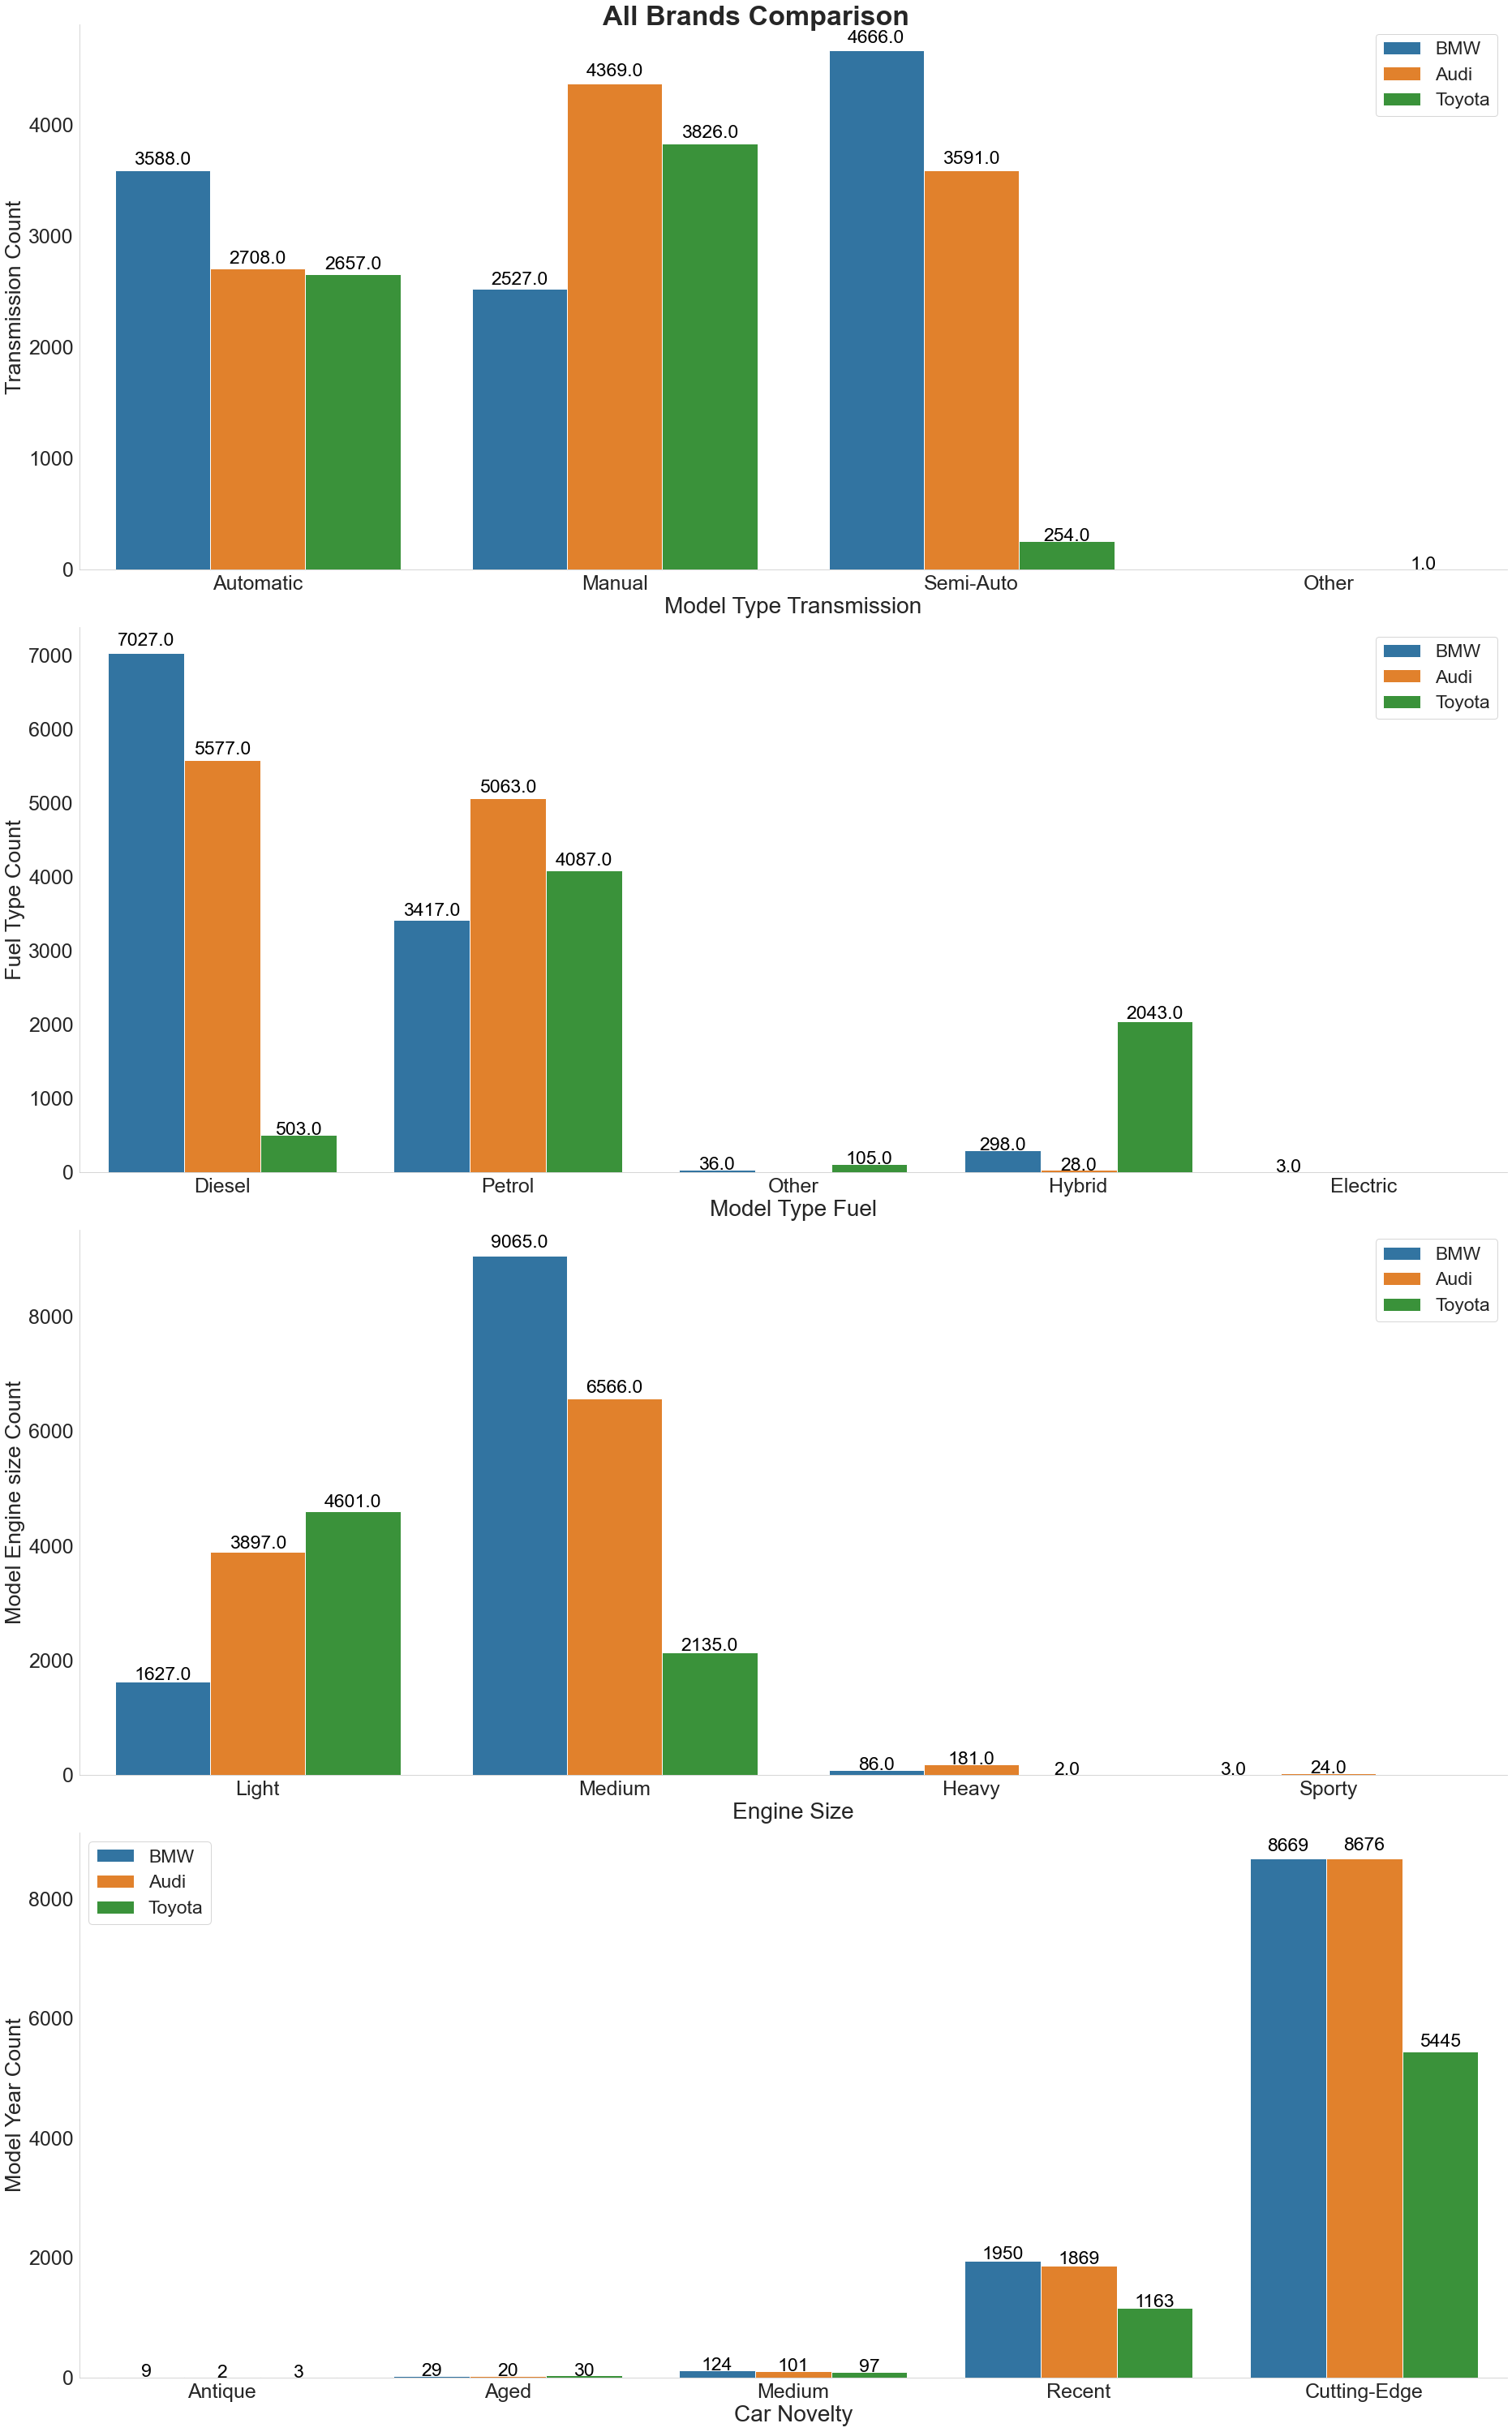

In [28]:
fig, (ax35, ax36, ax37, ax38) = plt.subplots(4,1,figsize=(26,42))
fig.suptitle("All Brands Comparison", fontsize=34,fontweight='bold', verticalalignment="bottom")

#Plot 1 
plt.subplot(4,1,1)
ax35 = sns.countplot(x='transmission', hue='Car Brand',ax=ax35, data=cars)
for i in ax35.patches:    
    ax35.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.015,
            s = f"{i.get_height()}", 
            ha = 'center', size = 23, rotation = 0, color = 'black')
ax35.set_xlabel('Model Type Transmission',fontsize=28,fontweight='normal') 
ax35.set_ylabel('Transmission Count',fontsize=27,fontweight='normal')    
plt.xticks( fontsize=25)
plt.yticks( fontsize=25)
ax35.spines['right'].set_visible(False)
ax35.spines['top'].set_visible(False)
ax35.legend(loc=1,fontsize = 23)

#Plot 2
plt.subplot(4,1,2)
ax36 = sns.countplot(x='fuelType', hue='Car Brand',ax=ax36, data=cars)
for i in ax36.patches:    
    ax36.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.015,
            s = f"{i.get_height()}", 
            ha = 'center', size = 23, rotation = 0, color = 'black')
ax36.set_ylabel('Fuel Type Count',fontsize=27,fontweight='normal')  
ax36.set_xlabel('Model Type Fuel',fontsize=28,fontweight='normal') 
plt.xticks( fontsize=25)
plt.yticks( fontsize=25)
ax36.spines['right'].set_visible(False)
ax36.spines['top'].set_visible(False)
ax36.legend(loc=1,fontsize = 23)

#Plot 3
plt.subplot(4,1,3)
ax37 = sns.countplot(x='Engine Size Level', hue='Car Brand',ax=ax37, data=cars)
for i in ax37.patches:    
    ax37.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.015,
            s = f"{i.get_height()}", 
            ha = 'center', size = 23, rotation = 0, color = 'black')
ax37.set_ylabel('Model Engine size Count',fontsize=27,fontweight='normal') 
ax37.set_xlabel('Engine Size',fontsize=28,fontweight='normal') 
plt.xticks( fontsize=25)
plt.yticks( fontsize=25)
ax37.spines['right'].set_visible(False)
ax37.spines['top'].set_visible(False)
ax37.legend(loc=1,fontsize = 23)

#Plot 4
plt.subplot(4,1,4)
ax38 = sns.countplot(x='Car Novelty', hue='Car Brand',ax=ax38, data=cars)
for i in ax38.patches:    
    ax38.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.015,
            s = f"{i.get_height()}", 
            ha = 'center', size = 23, rotation = 0, color = 'black')
ax38.set_ylabel('Model Year Count',fontsize=27,fontweight='normal') 
ax38.set_xlabel('Car Novelty',fontsize=28,fontweight='normal') 
plt.xticks( fontsize=25)
plt.yticks( fontsize=25)
ax38.spines['right'].set_visible(False)
ax38.spines['top'].set_visible(False)
ax38.legend(loc=0,fontsize = 23)

plt.tight_layout()

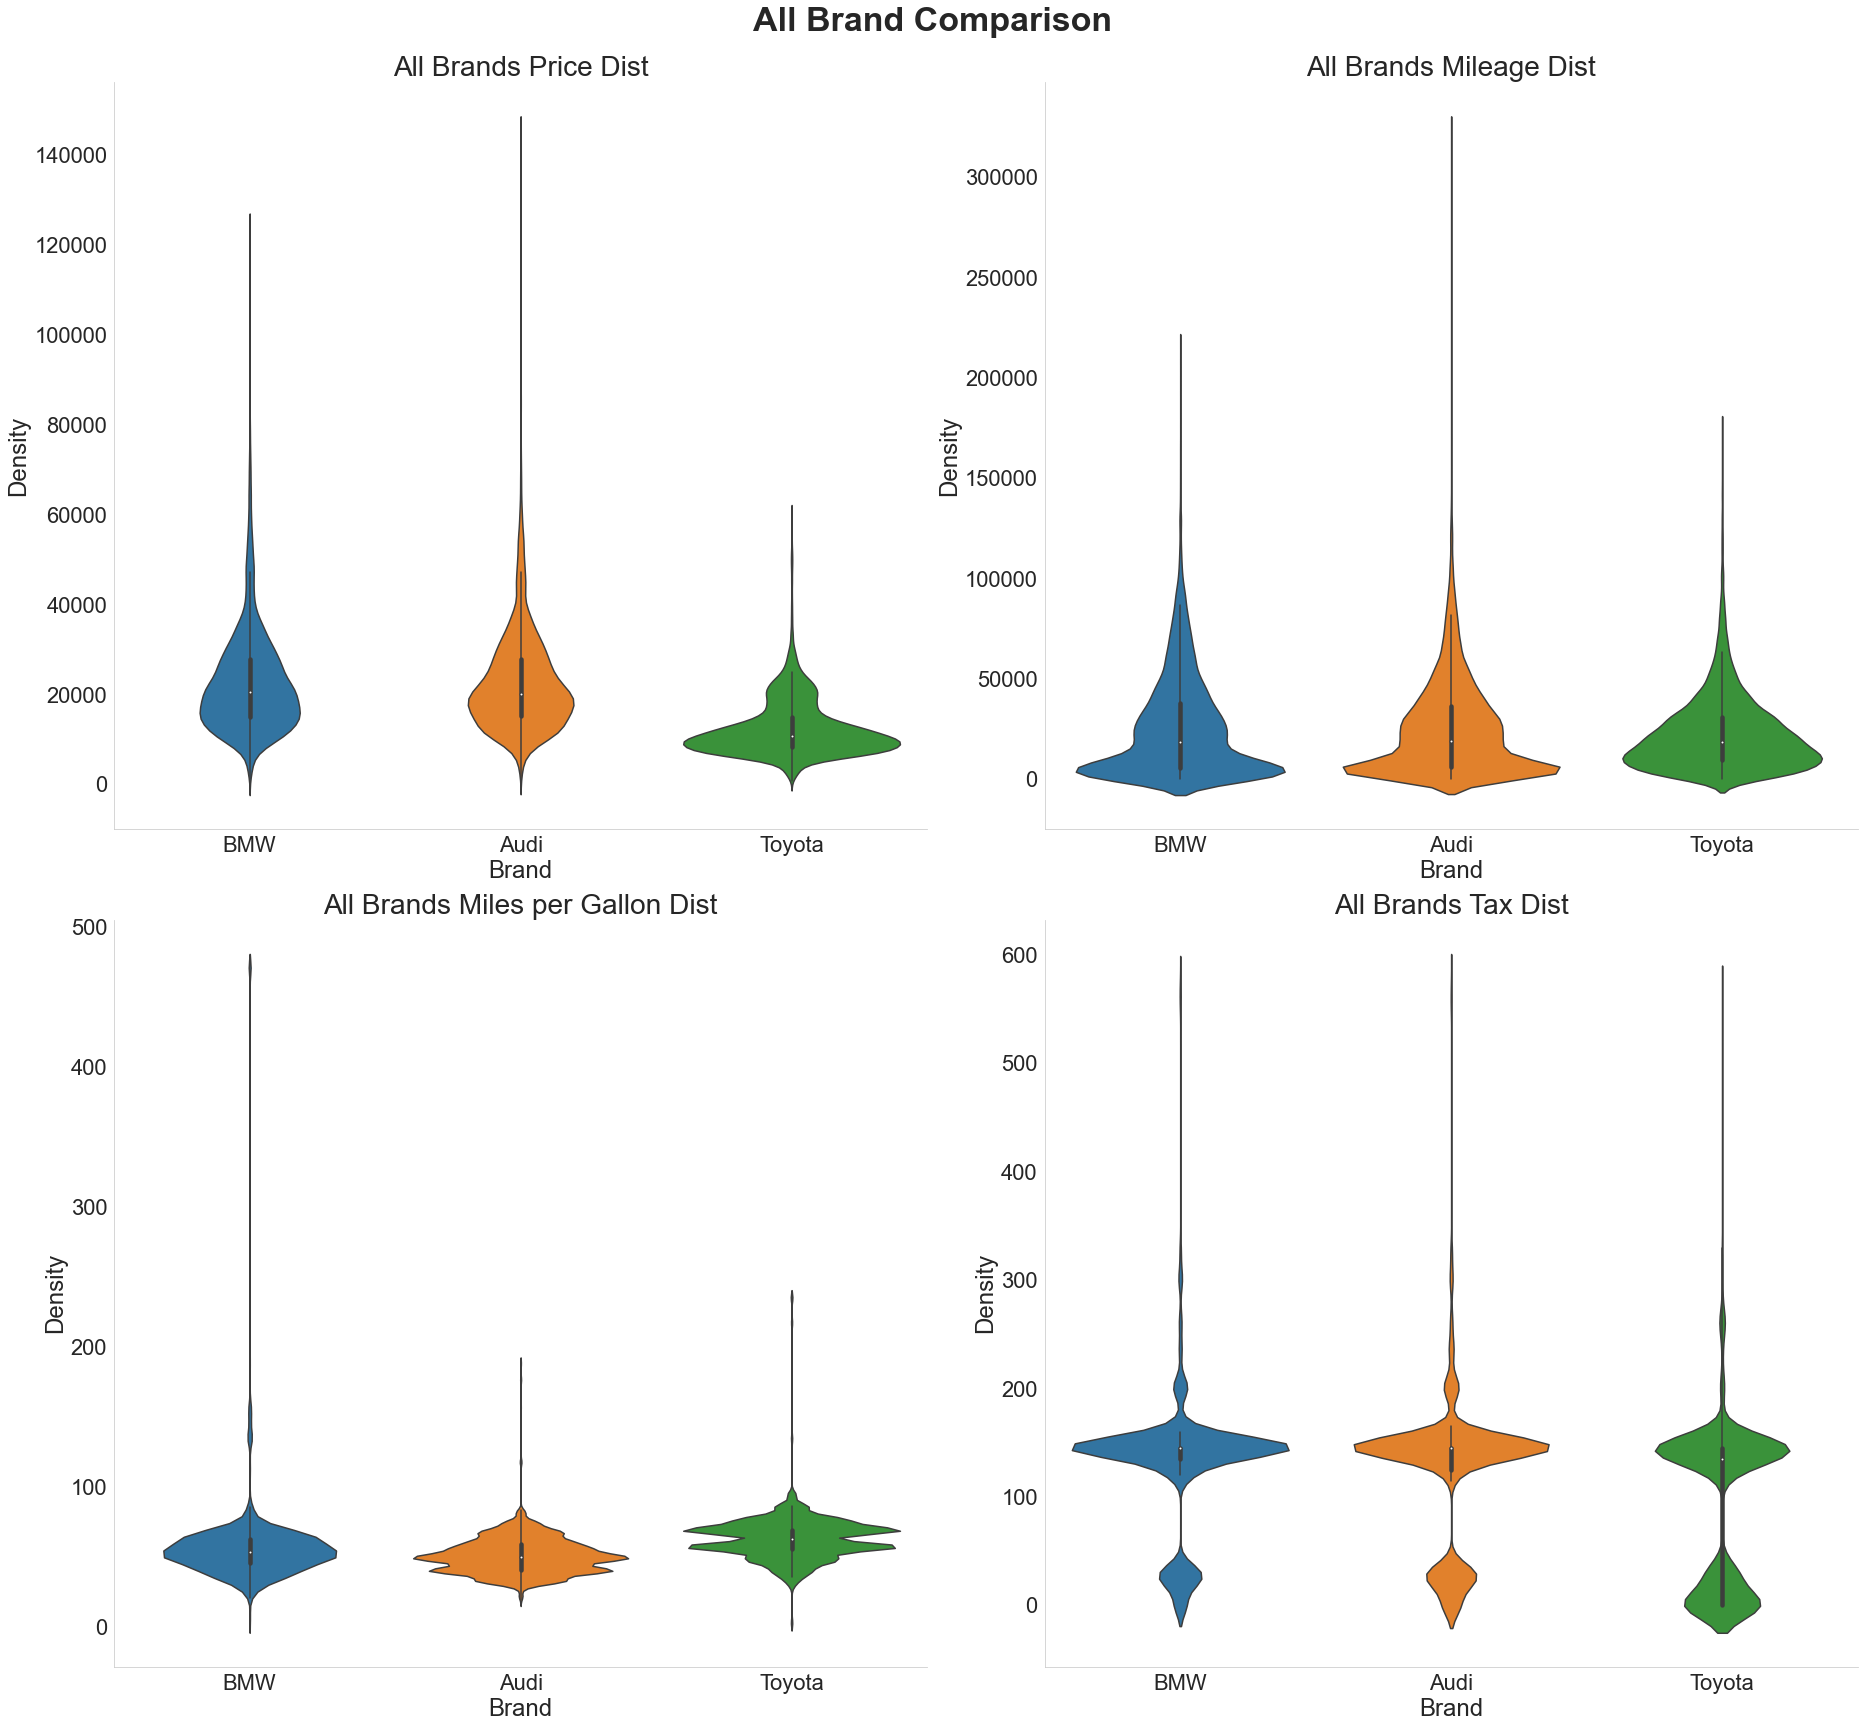

In [29]:
fig, ((ax39, ax40), (ax41, ax42)) = plt.subplots(2,2,figsize=(26,24))
fig.suptitle("All Brand Comparison", fontsize=34,fontweight='bold', verticalalignment="bottom")

#Plot 1
plt.subplot(2,2,1)
ax39 = sns.violinplot(x='Car Brand', y='price',ax=ax39, data=cars)
ax39.set_ylabel('Density',fontsize=24,fontweight='normal')    
ax39.set_xlabel('Brand',fontsize=24,fontweight='normal') 
plt.xticks( fontsize=22)
plt.yticks( fontsize=22)
ax39.spines['right'].set_visible(False)
ax39.spines['top'].set_visible(False)
ax39.set_title('All Brands Price Dist',fontsize=28, fontweight='normal')

# Plot 2
plt.subplot(2,2,2)
ax40 = sns.violinplot(x='Car Brand', y='mileage',ax=ax40, data=cars)
ax40.set_ylabel('Density',fontsize=24,fontweight='normal')  
ax40.set_xlabel('Brand',fontsize=24,fontweight='normal') 
plt.xticks( fontsize=22)
plt.yticks( fontsize=22)
ax40.spines['right'].set_visible(False)
ax40.spines['top'].set_visible(False)
ax40.set_title('All Brands Mileage Dist',fontsize=28, fontweight='normal')

# Plot 3
plt.subplot(2,2,3)
ax41 = sns.violinplot(x='Car Brand', y='mpg',ax=ax41, data=cars)
ax41.set_ylabel('Density',fontsize=24,fontweight='normal')   
ax41.set_xlabel('Brand',fontsize=24,fontweight='normal') 
plt.xticks( fontsize=22)
plt.yticks( fontsize=22)
ax41.spines['right'].set_visible(False)
ax41.spines['top'].set_visible(False)
ax41.set_title('All Brands Miles per Gallon Dist',fontsize=28, fontweight='normal')

# Plot 4
plt.subplot(2,2,4)
ax42 = sns.violinplot(x='Car Brand', y='tax',ax=ax42, data=cars)
ax42.set_ylabel('Density',fontsize=24,fontweight='normal')
ax42.set_xlabel('Brand',fontsize=24,fontweight='normal') 
plt.xticks( fontsize=22)
plt.yticks( fontsize=22)
ax42.spines['right'].set_visible(False)
ax42.spines['top'].set_visible(False)
ax42.set_title('All Brands Tax Dist',fontsize=28, fontweight='normal')

plt.tight_layout()

### Data Filtering WIth PandaSQL

### Question 1

Find the car model which satisfy the followings:
 - Average Price is between the the Highest price for BMW 2 series model and the lowest price for Audi A5 model
 - Miles per gallon is greater than or equal to the average miles per gallon of the top 100 BMW  3 series model 
 - Tax is less than or equal to max tax for the yaris toyota model

In [33]:
query1 = """
WITH CTE100 AS
(WITH CTE1 AS
(SELECT model, price
FROM (SELECT model, price,
    RANK() OVER(PARTITION BY model ORDER BY price DESC) Rank
    FROM cars
    WHERE model IN (' 2 Series')
    ORDER BY 3 
) SUBQUERY
WHERE Rank < 2)

,CTE2 AS
(SELECT model, price
FROM (SELECT model, price,
    RANK() OVER(PARTITION BY model ORDER BY price) Rank2
    FROM cars
    WHERE model IN (' A5')
    ORDER BY 3
) SUBQUERY
WHERE Rank2 < 2)

SELECT model, AVG(price) Avg_Price
FROM cars
GROUP BY 1
HAVING AVG(price) < (SELECT price FROM CTE1) AND 
price > (SELECT price FROM CTE2)
ORDER BY 2 DESC)

, CTE101 AS
(WITH CTE3 AS
(SELECT model, mpg
FROM (SELECT DISTINCT model, mpg,
    RANK() OVER(PARTITION BY model ORDER BY mpg DESC) Rank3
    FROM cars
    WHERE model IN (' 3 Series')
    ORDER BY 3 DESC
) SUBQUERY
WHERE Rank3 < 2)

SELECT DISTINCT model, mpg
FROM cars
WHERE mpg > (SELECt mpg FROM CTE3)
ORDER BY 2 DESC)

, CTE102 AS
(WITH CTE4 AS
(SELECT model, tax
FROM (SELECT model, tax,
    RANK() OVER(PARTITION BY model ORDER BY tax DESC) Rank4
    FROM cars
    WHERE model IN (' Yaris')
    ORDER BY 3 
) SUBQUERY
WHERE Rank4 < 2)

SELECT DISTINCT model, tax
FROM cars
WHERE tax >= (SELECT tax FROM CTE4)
ORDER BY 2 DESC)

SELECT DISTINCT model
FROM cars
WHERE tax IN (SELECT tax FROM CTE102) OR
mpg IN (SELECT mpg FROM CTE101)
ORDER BY 1
"""

sql_run(query1)

,model
0,1 Series
1,2 Series
2,3 Series
3,4 Series
4,5 Series
5,6 Series
6,7 Series
7,A1
8,A3
9,A4


### Question 2 

Find the car model, fueltype and transmission which satisfy the followings:
 - Average Mileage is in between the Average top 100 Highest mileage for diesel Automatic and the Average top 100 highest mileage for Semi Auto and Petrol
 - Average Miles per gallon is in between the Average 100 Highest miles per gallon for diesel Manual and the Average of top 100 miles per gallon for Hybrid Automatic
 - Average Price is in between the average top 100 highest price for diesel semi-auto and the average of top 100 price for petrol manual

In [85]:
query4 = """

WITH CTE100 AS
(WITH CTE1 AS
(SELECT DISTINCT model,mileage
FROM(SELECT model, mileage,
RANK() OVER(PARTITION BY fueltype and transmission ORDER BY mileage DESC) Rank5
FROM cars
WHERE fueltype IN ('Diesel') AND transmission IN ('Automatic')
) SUBQUERY
WHERE Rank5 < 101)

,CTE2 AS
(SELECT DISTINCT model,mileage
FROM(SELECT DISTINCT model, mileage,
RANK() OVER(PARTITION BY fueltype and transmission ORDER BY mileage DESC) Rank6
FROM cars
WHERE fueltype IN ('Petrol') AND transmission IN ('Semi-Auto')
) SUBQUERY
WHERE Rank6 < 101)

SELECT model, AVG(mileage)
FROM cars
GROUP BY 1
HAVING AVG(mileage) <= (SELECT AVG(mileage) FROM CTE1) AND 
AVG(mileage) <= (SELECT AVG(mileage) FROM CTE2)
ORDER BY 2 DESC)

, CTE101 AS
(WITH CTE3 AS
(SELECT DISTINCT model,mpg
FROM(SELECT model, mpg,
RANK() OVER(PARTITION BY fueltype and transmission ORDER BY mpg DESC) Rank7
FROM cars
WHERE fueltype IN ('Diesel') AND transmission IN ('Manual')
) SUBQUERY
WHERE Rank7 < 101)

,CTE4 AS
(SELECT DISTINCT model,mpg
FROM(SELECT DISTINCT model, mpg,
RANK() OVER(PARTITION BY fueltype and transmission ORDER BY mpg DESC) Rank8
FROM cars
WHERE fueltype IN ('Hybrid') AND transmission IN ('Automatic')
) SUBQUERY
WHERE Rank8 < 101)

SELECT model, AVG(mpg)
FROM cars
GROUP BY 1
HAVING AVG(mpg) <= (SELECT AVG(mpg) FROM CTE3) AND 
AVG(mpg) <= (SELECT AVG(mileage) FROM CTE4)
ORDER BY 2 DESC)

, CTE102 AS
(WITH CTE7 AS
(SELECT DISTINCT model, price
FROM(SELECT model, price,
RANK() OVER(PARTITION BY fueltype and transmission ORDER BY price DESC) Rank10
FROM cars
WHERE fueltype IN ('Diesel') AND transmission IN ('Semi-Auto')
) SUBQUERY
WHERE Rank10 < 101)

,CTE8 AS
(SELECT DISTINCT model, price
FROM(SELECT DISTINCT model, price,
RANK() OVER(PARTITION BY fueltype and transmission ORDER BY price DESC) Rank11
FROM cars
WHERE fueltype IN ('Petrol') AND transmission IN ('Manual')
) SUBQUERY
WHERE Rank11 < 101)

SELECT model, AVG(price)
FROM cars
GROUP BY 1
HAVING AVG(price) <= (SELECT AVG(price) FROM CTE7) AND 
AVG(price) >= (SELECT AVG(mileage) FROM CTE8)
ORDER BY 2 DESC)

SELECT DISTINCT model
FROM cars
WHERE model IN (SELECT model FROM CTE100) AND
model IN (SELECT model FROM CTE101) AND
model IN (SELECT model FROM CTE102)
"""

sql_run(query4)

,model
0,7 Series
1,2 Series
2,4 Series
3,X3
4,X5
5,X4
6,M4
7,X2
8,X6
9,8 Series
